# Adatok betöltése

In [1]:
import json
import pandas as pd

json_path = '/Users/matetoth/TDK_kodok/tasks_df.json'

# Read the entire file into a list of dictionaries
with open(json_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Flatten the nested structures in the JSON data
flattened_data = []

for entry in data:
    flattened_entry = {}
    for key, value in entry.items():
        if isinstance(value, dict):
            # Flatten nested dictionaries
            for sub_key, sub_value in value.items():
                flattened_entry[f"{key}_{sub_key}"] = sub_value
        else:
            # Keep other values as they are
            flattened_entry[key] = value
    flattened_data.append(flattened_entry)

# Convert the flattened data to a DataFrame
tasks_df = pd.DataFrame(flattened_data)

# Display the first few rows of the DataFrame
tasks_df.head()

,4_digit_FEOR_code,task,task_share,Automation_possibility_1,Automation_possibility_2,Automation_possibility_3,Automation_possibility_4,Automation_possibility_5,Automation_possibility_6,Automation_possibility_avg,Automation_possibility_stdev
0,1110,törvényhozók esetében a hatáskörüket meghatáro...,0.2,5,0,5,0,5,5,3.33,2.58
1,1110,az ország és az adott terület társadalmi-gazd...,0.2,10,0,10,0,10,10,6.67,5.16
2,1110,"az általuk képviselt választók, illetve az ál...",0.2,5,0,5,0,5,5,3.33,2.58
3,1110,"az Országgyűlés munkájában, ülésein való rész...",0.2,5,0,5,0,5,5,3.33,2.58
4,1110,"minisztériumok, illetve hatáskörükbe rendelt ...",0.2,15,0,10,0,10,15,8.33,6.83


In [2]:
import json
import pandas as pd

json_path = '/Users/matetoth/TDK_kodok/econ_df.json'

# Read the entire file into a list of dictionaries
with open(json_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Flatten the nested structures in the JSON data
flattened_data = []

for entry in data:
    flattened_entry = {}
    for key, value in entry.items():
        if isinstance(value, dict):
            # Flatten nested dictionaries
            for sub_key, sub_value in value.items():
                flattened_entry[f"{key}_{sub_key}"] = sub_value
        else:
            # Keep other values as they are
            flattened_entry[key] = value
    flattened_data.append(flattened_entry)

# Convert the flattened data to a DataFrame
econ_df = pd.DataFrame(flattened_data)

# Display the first few rows of the DataFrame
econ_df.head()

,4_digit_FEOR_code,task,task_share,Automation_economic_feasibility_1,Automation_economic_feasibility_2,Automation_economic_feasibility_3,Automation_economic_feasibility_4,Automation_economic_feasibility_5,Automation_economic_feasibility_6,Automation_economic_feasibility_avg,Automation_economic_feasibility_stdev,task_share_x_avg
0,1110,törvényhozók esetében a hatáskörüket meghatáro...,0.2,0,0,0,0,0,0,0.0,0.0,0.0
1,1110,az ország és az adott terület társadalmi-gazd...,0.2,0,0,0,0,0,0,0.0,0.0,0.0
2,1110,"az általuk képviselt választók, illetve az ál...",0.2,0,0,0,0,0,0,0.0,0.0,0.0
3,1110,"az Országgyűlés munkájában, ülésein való rész...",0.2,0,0,0,0,0,0,0.0,0.0,0.0
4,1110,"minisztériumok, illetve hatáskörükbe rendelt ...",0.2,0,0,0,0,0,0,0.0,0.0,0.0


# Kategóriák számítása

In [254]:
import pandas as pd

def analyze_dataframe(df, avg_column_name):
    # Total number of rows in the DataFrame
    total_rows = df.shape[0]

    # Rows with avg less than 10
    less_than_10 = df[df[avg_column_name] < 10].shape[0]

    # Rows with avg less than 30
    less_than_30 = df[df[avg_column_name] < 30].shape[0]

    # Rows with avg more than 70
    more_than_70 = df[df[avg_column_name] > 70].shape[0]

    # Rows with avg more than 90
    more_than_90 = df[df[avg_column_name] > 90].shape[0]

    # Average of the avg column
    avg_of_avg = df[avg_column_name].mean()
    
    # Median of the avg column
    median_of_avg = df[avg_column_name].median()

    # Printing the results
    print(f"Total rows: {total_rows}")
    print(f"Rows with {avg_column_name} < 10: {less_than_10}")
    print(f"Rows with {avg_column_name} < 30: {less_than_30}")
    print(f"Rows with {avg_column_name} > 70: {more_than_70}")
    print(f"Rows with {avg_column_name} > 90: {more_than_90}")
    print(f"Average of {avg_column_name}: {avg_of_avg:.2f}")
    print(f"Median of {avg_column_name}: {median_of_avg:.2f}")

# Assuming 'tasks_df' and 'econ_df' are your DataFrames
print("Analysis for tasks_df (Automation Possibility):")
analyze_dataframe(tasks_df, 'Automation_possibility_avg')

print("\nAnalysis for econ_df (Economic Feasibility):")
analyze_dataframe(econ_df, 'Automation_economic_feasibility_avg')


Analysis for tasks_df (Automation Possibility):
Total rows: 3947
Rows with Automation_possibility_avg < 10: 220
Rows with Automation_possibility_avg < 30: 799
Rows with Automation_possibility_avg > 70: 1559
Rows with Automation_possibility_avg > 90: 224
Average of Automation_possibility_avg: 57.19
Median of Automation_possibility_avg: 63.33

Analysis for econ_df (Economic Feasibility):
Total rows: 3947
Rows with Automation_economic_feasibility_avg < 10: 820
Rows with Automation_economic_feasibility_avg < 30: 1718
Rows with Automation_economic_feasibility_avg > 70: 827
Rows with Automation_economic_feasibility_avg > 90: 92
Average of Automation_economic_feasibility_avg: 39.77
Median of Automation_economic_feasibility_avg: 35.83


# Munkafeladatok szerinti ábrázolások

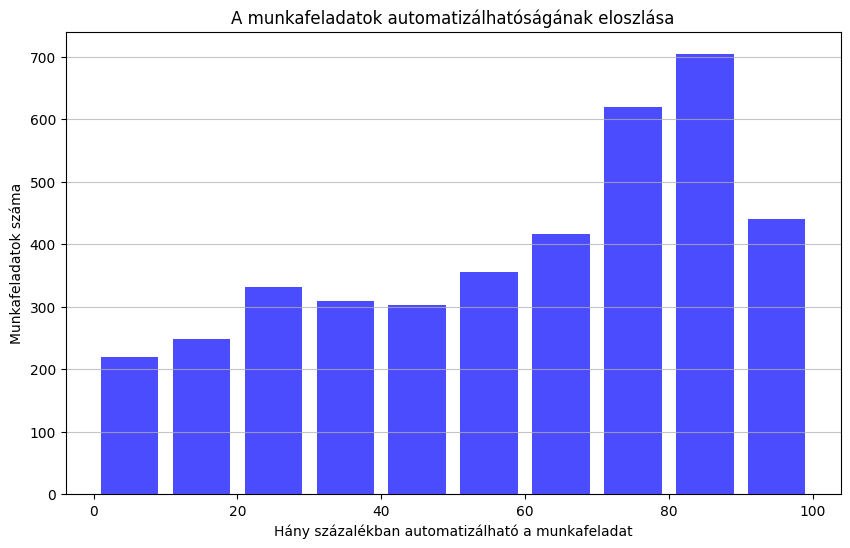

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'tasks_df' is your DataFrame

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(tasks_df['Automation_possibility_avg'], bins=10, alpha=0.7, color='blue', rwidth=0.8)  # Set bins to 10 and adjust bar width with rwidth
plt.title('A munkafeladatok automatizálhatóságának eloszlása')
plt.xlabel('Hány százalékban automatizálható a munkafeladat')
plt.ylabel('Munkafeladatok száma')
plt.grid(axis='y', alpha=0.75)

plt.show()


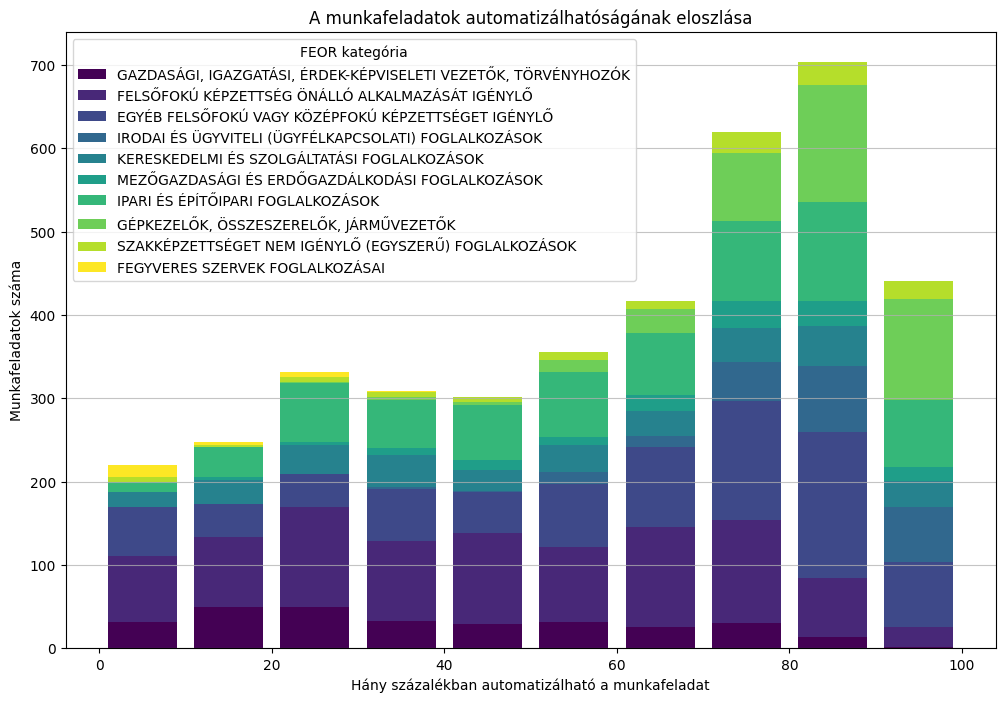

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'tasks_df' is your DataFrame

# Map the first digit to the corresponding categories
category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ',
    '3': 'EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ',
    '4': 'IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

# Create a new column for the category based on the first digit of '4_digit_FEOR_code'
tasks_df['FEOR_category'] = tasks_df['4_digit_FEOR_code'].astype(str).str[0].map(category_map)

# Get the list of categories for plotting
categories = tasks_df['FEOR_category'].unique()

# Prepare data for each category
data_to_plot = [tasks_df[tasks_df['FEOR_category'] == category]['Automation_possibility_avg'] for category in categories]

# Define colors (make sure you have enough colors for your categories)
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Plotting
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(data_to_plot, bins=10, stacked=True, color=colors, rwidth=0.8, label=categories)
plt.title('A munkafeladatok automatizálhatóságának eloszlása')
plt.xlabel('Hány százalékban automatizálható a munkafeladat')
plt.ylabel('Munkafeladatok száma')
plt.legend(title='FEOR kategória')
plt.grid(axis='y', alpha=0.75)

plt.savefig('/Users/matetoth/TDK_kodok/automation_possibility_avg_distribution.png', dpi=500, bbox_inches='tight')

plt.show()


In [ ]:
category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI\nVEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ\nALKALMAZÁSÁT IGÉNYLŐ FOGLALKOZÁSOK',
    '3': 'EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ\nKÉPZETTSÉGET IGÉNYLŐ FOGLALKOZÁSOK',
    '4': 'IRODAI ÉS ÜGYVITELI\n(ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ\n(EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

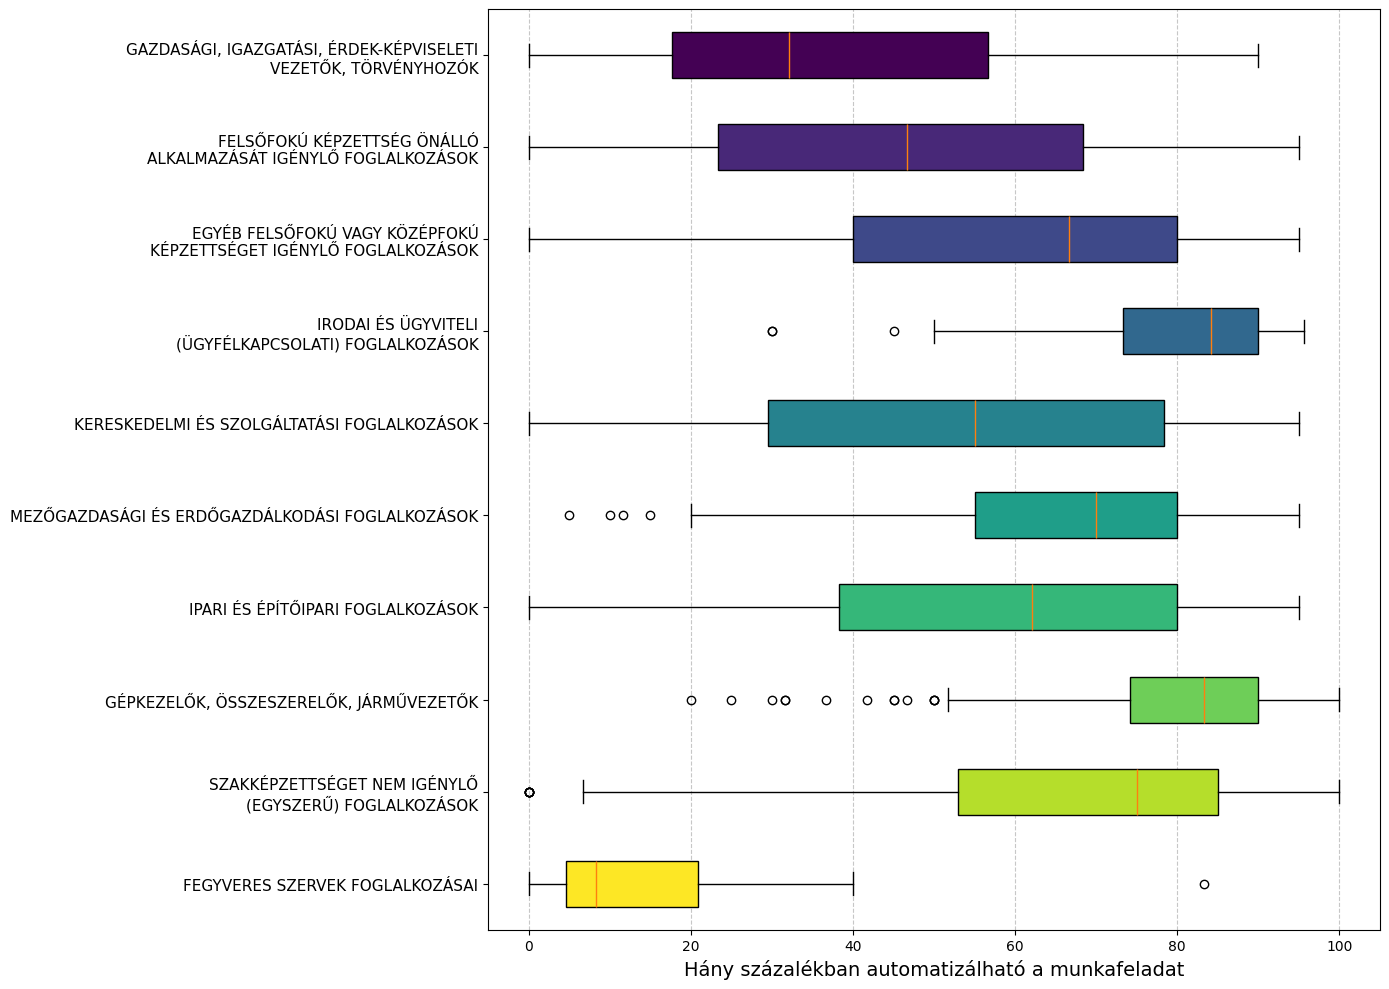

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


# Update the FEOR_category in tasks_df
tasks_df['FEOR_category'] = tasks_df['4_digit_FEOR_code'].astype(str).str[0].map(category_map)

# Prepare data for the box plot
data_to_plot = [tasks_df[tasks_df['FEOR_category'] == category]['Automation_possibility_avg'] for category in category_map.values()]
categories_ordered = list(category_map.values())

# Define colors
colors = plt.cm.viridis(np.linspace(0, 1, len(category_map)))

# Color mapping by category in original order
color_map = dict(zip(categories_ordered, colors))

# Plotting
plt.figure(figsize=(14, 10))
box = plt.boxplot(data_to_plot[::-1], patch_artist=True, vert=False)  # Boxplot is horizontal and data is reversed

# Apply colors to each box, ensuring that the colors match the original category
for patch, category in zip(box['boxes'], categories_ordered[::-1]):
    patch.set_facecolor(color_map[category])

# Set y-tick labels to reversed category names
plt.yticks(np.arange(1, len(category_map) + 1), labels=categories_ordered[::-1], fontsize=11)
plt.xlabel('Hány százalékban automatizálható a munkafeladat', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid for x-axis

plt.tight_layout()
plt.savefig('/Users/matetoth/TDK_kodok/automation_possibility_avg_distribution_boxplot_horizontal.png', dpi=500, bbox_inches='tight')
plt.show()

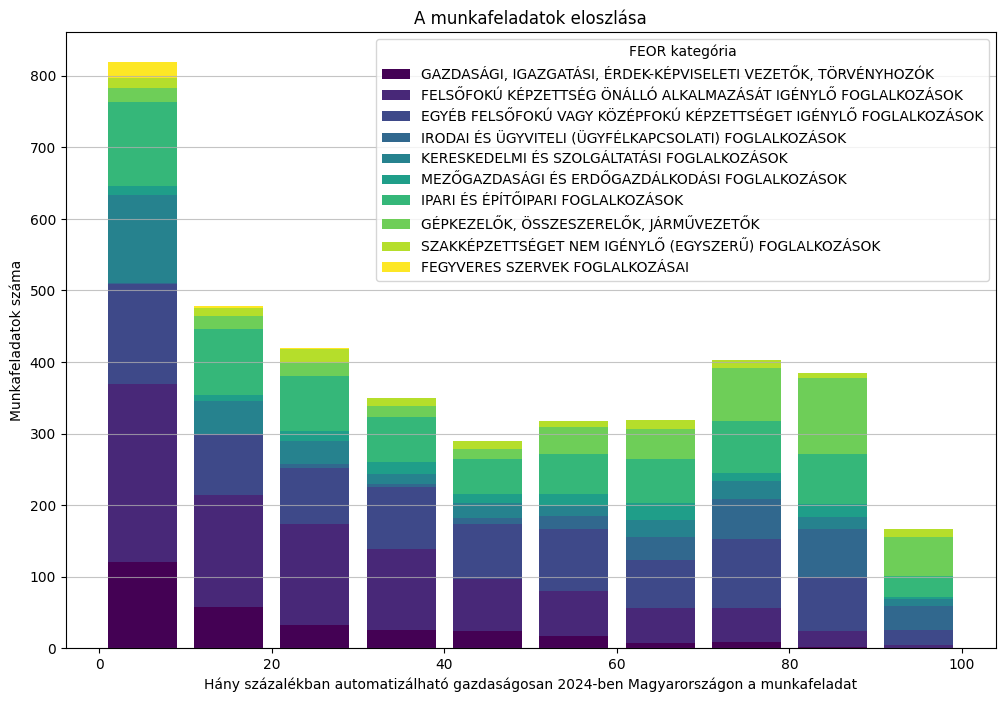

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'econ_df' is your DataFrame

# Map the first digit to the corresponding categories and update references
category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ FOGLALKOZÁSOK',
    '3': 'EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ FOGLALKOZÁSOK',
    '4': 'IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

econ_df['FEOR_category'] = econ_df['4_digit_FEOR_code'].astype(str).str[0].map(category_map)

# Get the list of categories for plotting
categories = econ_df['FEOR_category'].unique()

# Prepare data for each category
data_to_plot = [econ_df[econ_df['FEOR_category'] == category]['Automation_economic_feasibility_avg'] for category in categories]

# Define colors
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Plotting
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(data_to_plot, bins=10, stacked=True, color=colors, rwidth=0.8, label=categories)
plt.title('A munkafeladatok eloszlása')
plt.xlabel('Hány százalékban automatizálható gazdaságosan 2024-ben Magyarországon a munkafeladat')
plt.ylabel('Munkafeladatok száma')
plt.legend(title='FEOR kategória')
plt.grid(axis='y', alpha=0.75)

plt.savefig('/Users/matetoth/TDK_kodok/automation_feasibility_avg_distribution.png', dpi=1000, bbox_inches='tight')

plt.show()


In [275]:
category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI\nVEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ\nALKALMAZÁSÁT IGÉNYLŐ FOGLALKOZÁSOK',
    '3': 'EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ\nKÉPZETTSÉGET IGÉNYLŐ FOGLALKOZÁSOK',
    '4': 'IRODAI ÉS ÜGYVITELI\n(ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ\n(EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

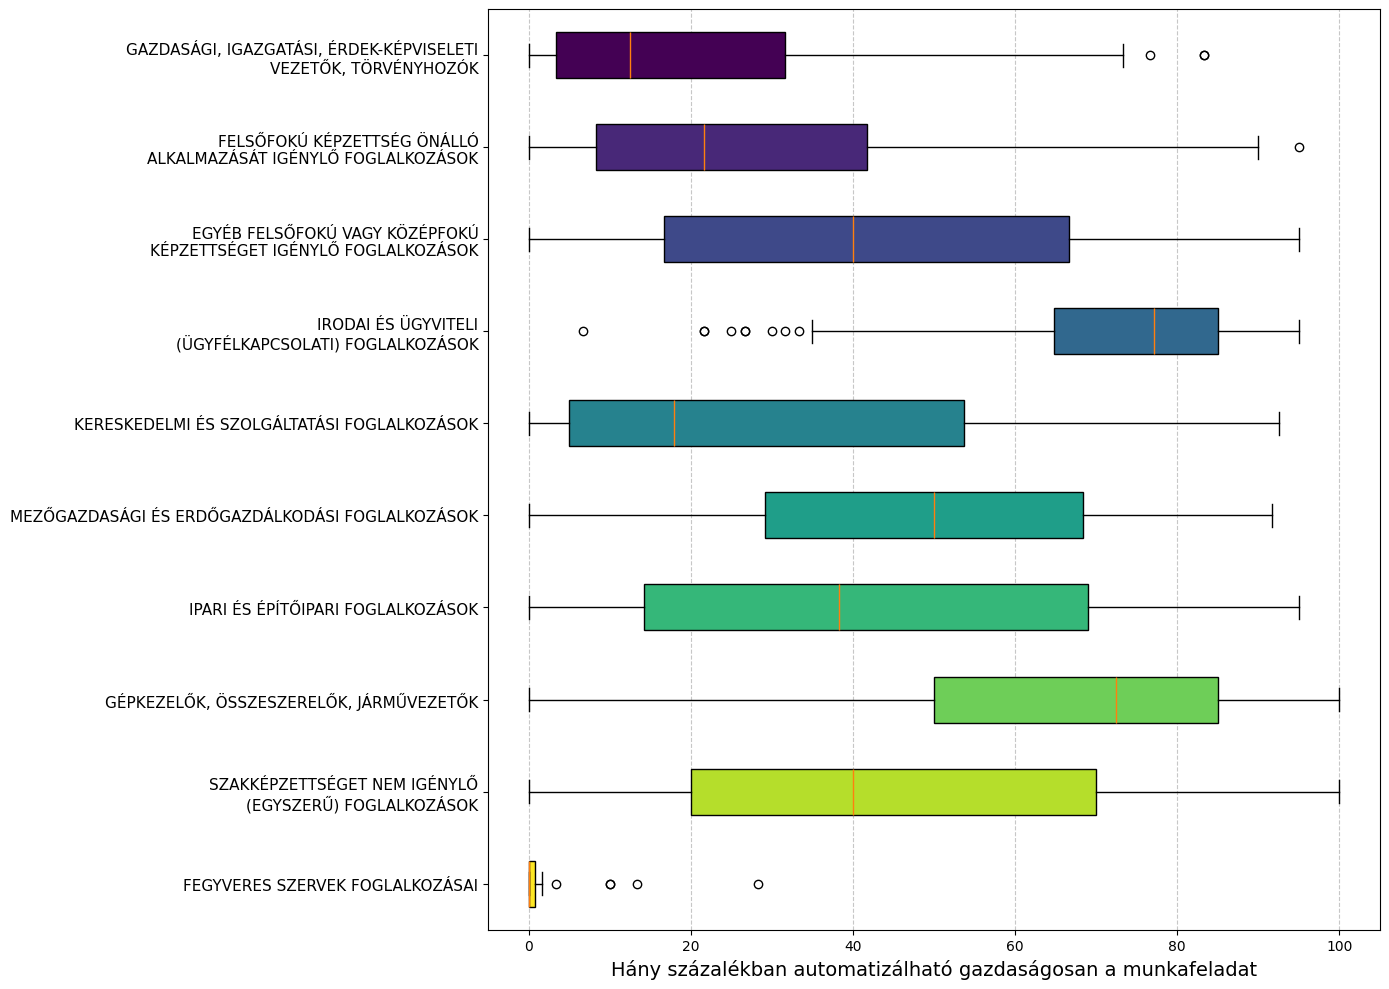

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'econ_df' is your DataFrame and 'category_map' is defined as before

# Update the FEOR_category in econ_df
econ_df['FEOR_category'] = econ_df['4_digit_FEOR_code'].astype(str).str[0].map(category_map)

# Prepare data for the box plot, reversing the order
data_to_plot = [econ_df[econ_df['FEOR_category'] == category]['Automation_economic_feasibility_avg'] for category in category_map.values()][::-1]

# Define colors
colors = plt.cm.viridis(np.linspace(0, 1, len(category_map)))

# Color mapping by category in original order
color_map = dict(zip(categories_ordered, colors))

# Plotting
plt.figure(figsize=(14, 10))
box = plt.boxplot(data_to_plot, patch_artist=True, vert=False)  # Set vert=False to make the boxplot horizontal

# Apply colors to each box, ensuring that the colors match the original category
for patch, category in zip(box['boxes'], categories_ordered[::-1]):
    patch.set_facecolor(color_map[category])

plt.yticks(np.arange(1, len(category_map) + 1), labels=list(category_map.values())[::-1], fontsize=11)
plt.xlabel('Hány százalékban automatizálható gazdaságosan a munkafeladat', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Change grid line axis to x

plt.tight_layout()
plt.savefig('/Users/matetoth/TDK_kodok/automation_feasibility_avg_distribution_boxplot_horizontal.png', dpi=500, bbox_inches='tight')
plt.show()

# Munkakörök szerinti ábrázolások

In [139]:
# Step 1: Calculate the product of task share and automation feasibility average
econ_df['task_share_x_feasibility'] = econ_df['task_share'] * econ_df['Automation_economic_feasibility_avg']

# Step 2: Sum these products for each 4-digit FEOR code
feor_summary = econ_df.groupby('4_digit_FEOR_code')['task_share_x_feasibility'].sum().reset_index()

# Now `feor_summary` DataFrame has the total percentage of job time that is automatable for each FEOR code

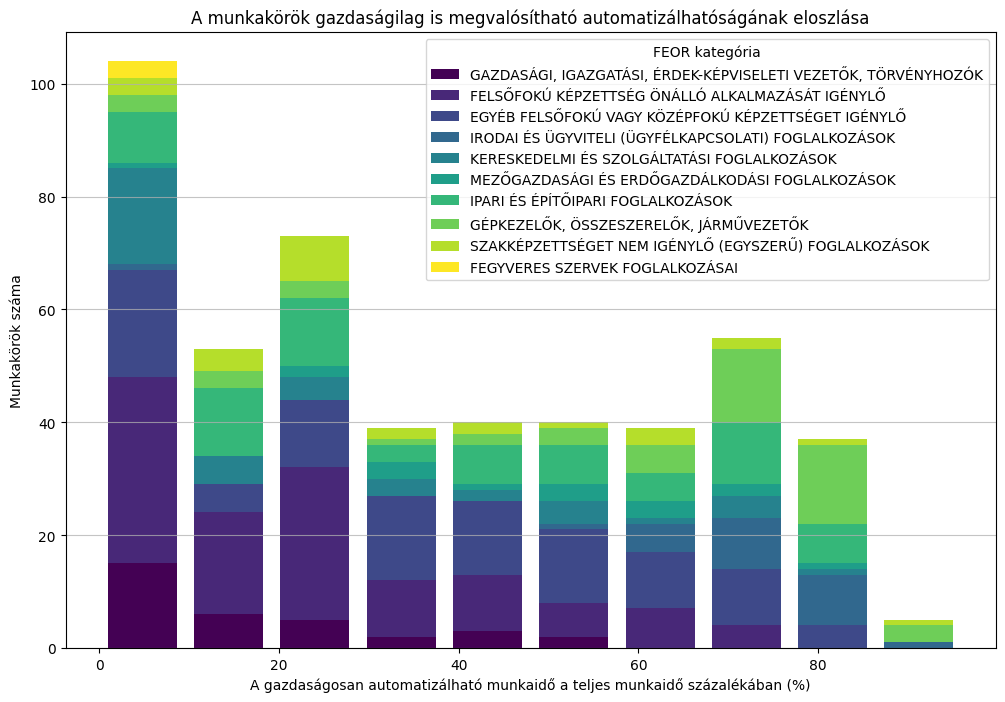

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feor_summary' is your DataFrame

# Map the first digit to the corresponding categories and update references
category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ',
    '3': 'EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ',
    '4': 'IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

# Create a new column for the category based on the first digit of '4_digit_FEOR_code'
feor_summary['FEOR_category'] = feor_summary['4_digit_FEOR_code'].astype(str).str[0].map(category_map)

# Ensure the order of categories according to your specification
categories_ordered = [category_map[str(i)] for i in range(1, 10)] + [category_map['0']]

# Prepare data for each category in the specified order
data_to_plot = [feor_summary[feor_summary['FEOR_category'] == category]['task_share_x_feasibility'] for category in categories_ordered]

# Define colors from purple to yellow
colors = plt.cm.viridis(np.linspace(0, 1, len(categories_ordered)))

# Plotting
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(data_to_plot, bins=10, stacked=True, color=colors, rwidth=0.8, label=categories_ordered)
plt.title('A munkakörök gazdaságilag is megvalósítható automatizálhatóságának eloszlása')
plt.xlabel('A gazdaságosan automatizálható munkaidő a teljes munkaidő százalékában (%)')
plt.ylabel('Munkakörök száma')
plt.legend(title='FEOR kategória')
plt.grid(axis='y', alpha=0.75)

plt.savefig('/Users/matetoth/TDK_kodok/job_automation_feasibility_avg_distribution.png', dpi=1000, bbox_inches='tight')

plt.show()


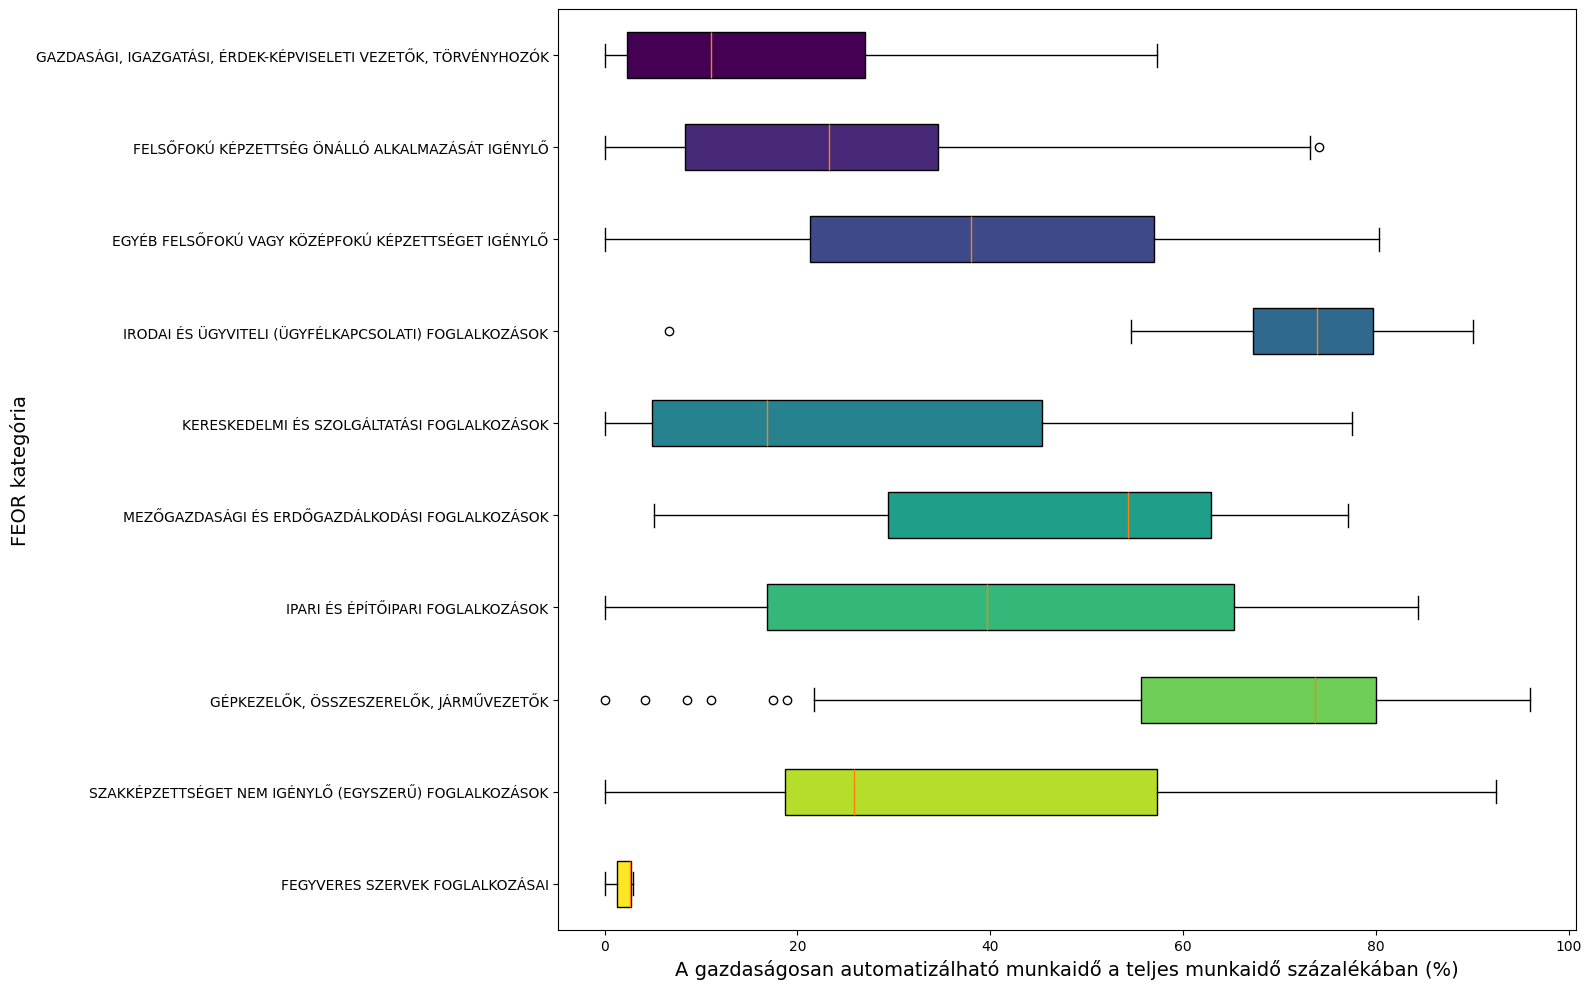

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feor_summary' is your DataFrame

# Map the first digit to the corresponding categories
category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ',
    '3': 'EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ',
    '4': 'IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

feor_summary['FEOR_category'] = feor_summary['4_digit_FEOR_code'].astype(str).str[0].map(category_map)

# Ordering the categories
categories_ordered = [category_map[str(i)] for i in range(1, 10)] + [category_map['0']]

# Prepare data for each category in the specified order
data_to_plot = [feor_summary[feor_summary['FEOR_category'] == category]['task_share_x_feasibility'].values for category in categories_ordered]

# Define colors from purple to yellow
colors = plt.cm.viridis(np.linspace(0, 1, len(categories_ordered)))

# Plotting
plt.figure(figsize=(16, 10))
# Creating a horizontal box plot
parts = plt.boxplot(data_to_plot, vert=False, patch_artist=True, labels=categories_ordered)

# Coloring each box
for patch, color in zip(parts['boxes'], colors):
    patch.set_facecolor(color)
    
plt.xlabel('A gazdaságosan automatizálható munkaidő a teljes munkaidő százalékában (%)', fontsize = 14)
plt.ylabel('FEOR kategória', fontsize = 14)

# Invert the y-axis to display the categories in the specified order from top to bottom
plt.gca().invert_yaxis()

plt.tight_layout()

plt.savefig('/Users/matetoth/TDK_kodok/job_automation_feasibility_avg_distribution_by_FEOR_groups.png', dpi=1000, bbox_inches='tight')

plt.show()


In [140]:
# Step 1: Calculate the product of task share and automation feasibility average
tasks_df['task_share_x_avg'] = tasks_df['task_share'] * tasks_df['Automation_possibility_avg']

# Step 2: Sum these products for each 4-digit FEOR code
feor_pos_summary = tasks_df.groupby('4_digit_FEOR_code')['task_share_x_avg'].sum().reset_index()

# Now `feor_pos_summary` DataFrame has the total percentage of job time that is automatable for each FEOR code
feor_pos_summary

,4_digit_FEOR_code,task_share_x_avg
0,0110,14.2905
1,0210,18.4338
2,0310,0.0000
3,1110,4.9980
4,1121,24.2590
...,...,...
480,9310,76.1660
481,9321,17.5000
482,9329,41.6700
483,9331,57.9175


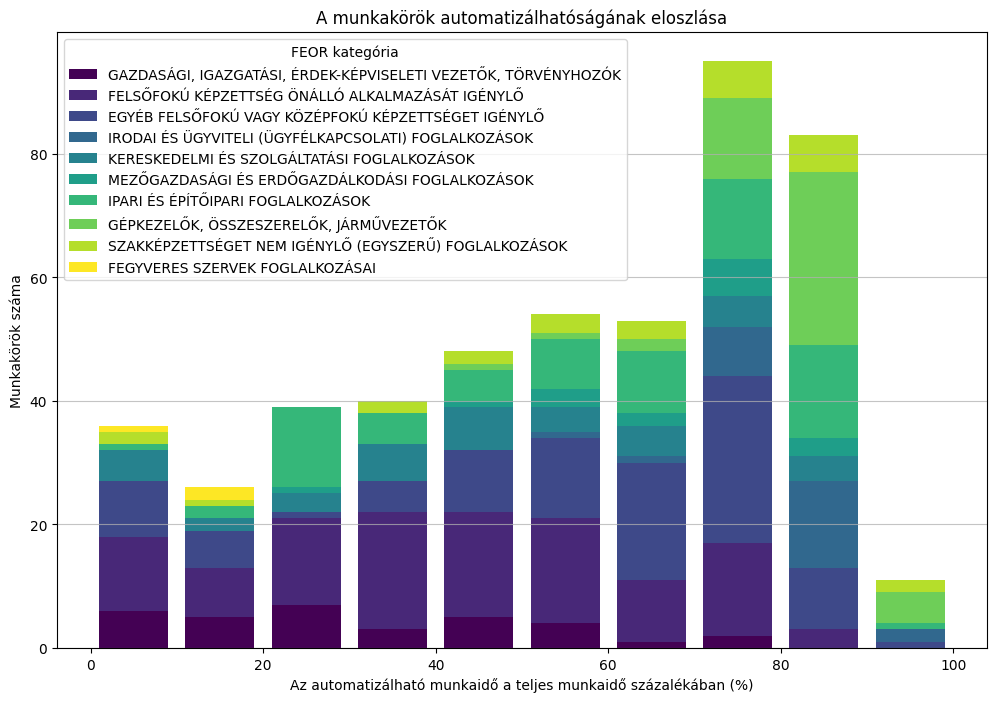

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Map the first digit to the corresponding categories and update references
category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ',
    '3': 'EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ',
    '4': 'IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

# Create a new column for the category based on the first digit of '4_digit_FEOR_code'
feor_pos_summary['FEOR_category'] = feor_pos_summary['4_digit_FEOR_code'].astype(str).str[0].map(category_map)

# Ensure the order of categories according to your specification
categories_ordered = [category_map[str(i)] for i in range(1, 10)] + [category_map['0']]

# Prepare data for each category in the specified order
data_to_plot = [feor_pos_summary[feor_pos_summary['FEOR_category'] == category]['task_share_x_avg'] for category in categories_ordered]

# Define colors from purple to yellow
colors = plt.cm.viridis(np.linspace(0, 1, len(categories_ordered)))

# Plotting
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(data_to_plot, bins=10, stacked=True, color=colors, rwidth=0.8, label=categories_ordered)
plt.title('A munkakörök automatizálhatóságának eloszlása')
plt.xlabel('Az automatizálható munkaidő a teljes munkaidő százalékában (%)')
plt.ylabel('Munkakörök száma')
plt.legend(title='FEOR kategória')
plt.grid(axis='y', alpha=0.75)

plt.savefig('/Users/matetoth/TDK_kodok/job_automation_possibility_avg_distribution.png', dpi=500, bbox_inches='tight')

plt.show()



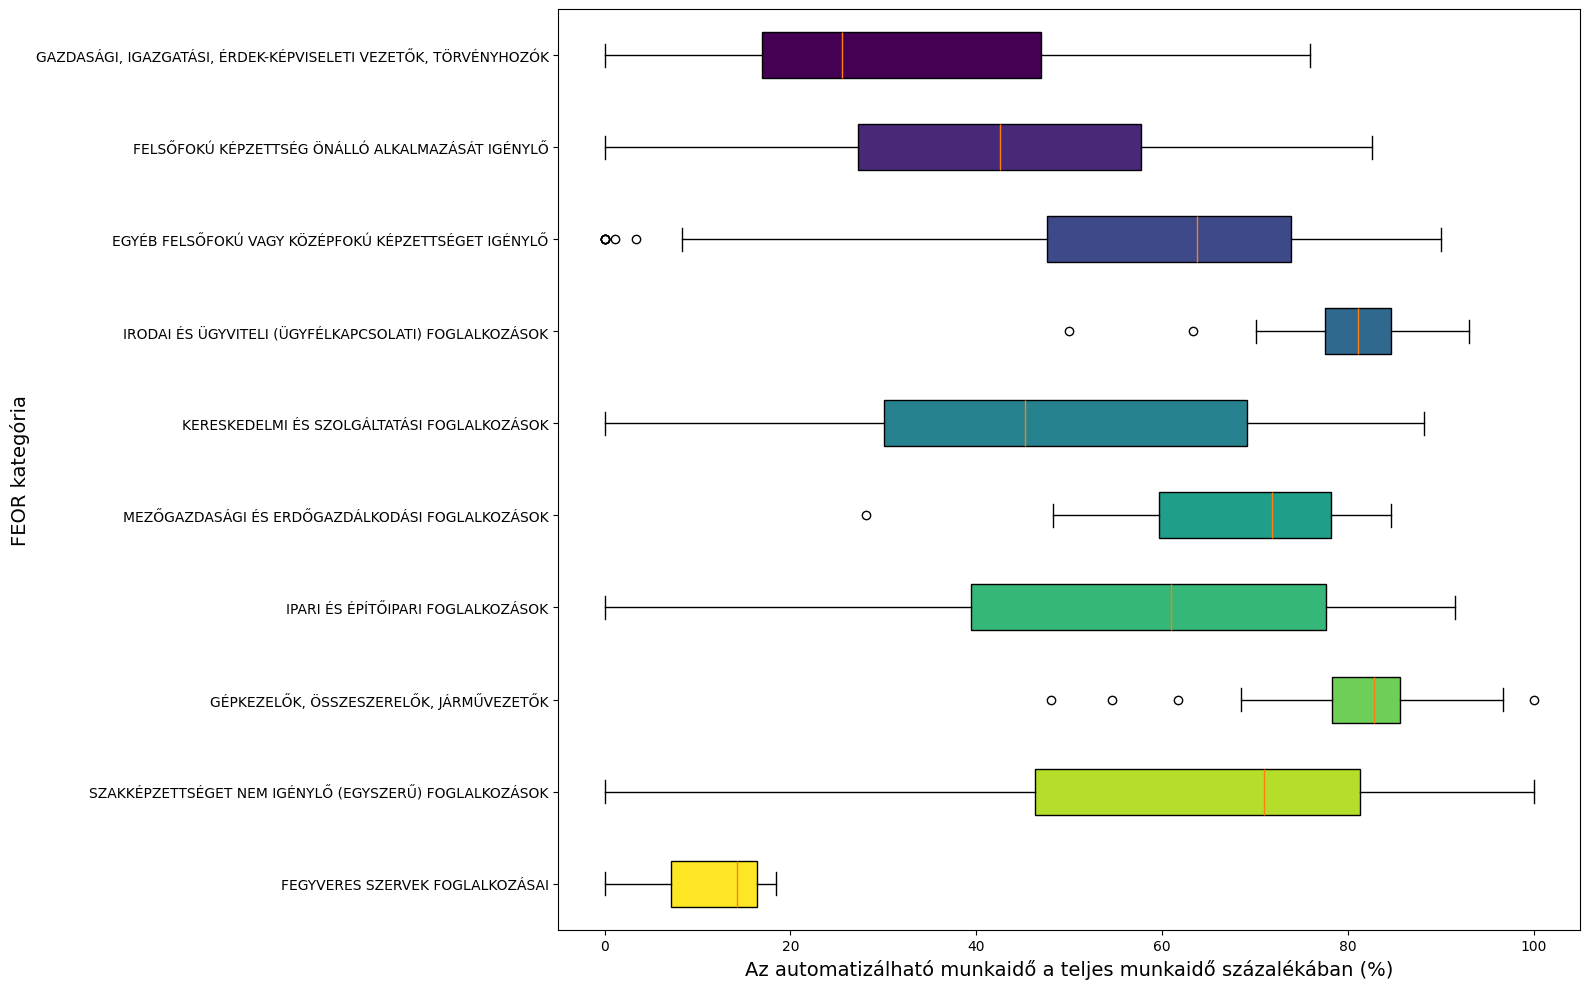

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Map the first digit to the corresponding categories
category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ',
    '3': 'EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ',
    '4': 'IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

feor_pos_summary['FEOR_category'] = feor_pos_summary['4_digit_FEOR_code'].astype(str).str[0].map(category_map)

# Ordering the categories
categories_ordered = [category_map[str(i)] for i in range(1, 10)] + [category_map['0']]

# Prepare data for each category in the specified order
data_to_plot = [feor_pos_summary[feor_pos_summary['FEOR_category'] == category]['task_share_x_avg'].values for category in categories_ordered]

# Define colors from purple to yellow
colors = plt.cm.viridis(np.linspace(0, 1, len(categories_ordered)))

# Plotting
plt.figure(figsize=(16, 10))
# Creating a horizontal box plot
parts = plt.boxplot(data_to_plot, vert=False, patch_artist=True, labels=categories_ordered)

# Coloring each box
for patch, color in zip(parts['boxes'], colors):
    patch.set_facecolor(color)
    
plt.xlabel('Az automatizálható munkaidő a teljes munkaidő százalékában (%)', fontsize = 14)
plt.ylabel('FEOR kategória', fontsize = 14)

# Invert the y-axis to display the categories in the specified order from top to bottom
plt.gca().invert_yaxis()

plt.tight_layout()

plt.savefig('/Users/matetoth/TDK_kodok/job_automation_possibility_avg_distribution_by_FEOR_groups.png', dpi=500, bbox_inches='tight')

plt.show()

In [61]:
feor_summary

,4_digit_FEOR_code,task_share_x_feasibility,FEOR_category
0,0110,2.6670,FEGYVERES SZERVEK FOGLALKOZÁSAI
1,0210,2.9162,FEGYVERES SZERVEK FOGLALKOZÁSAI
2,0310,0.0000,FEGYVERES SZERVEK FOGLALKOZÁSAI
3,1110,0.0000,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET..."
4,1121,5.7167,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET..."
...,...,...,...
480,9310,47.6660,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...
481,9321,25.6250,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...
482,9329,20.8300,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...
483,9331,21.2500,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...


In [255]:
import pandas as pd

analyze_dataframe(feor_summary, 'task_share_x_feasibility')
print('')
analyze_dataframe(feor_pos_summary, 'task_share_x_avg')


Total rows: 485
Rows with task_share_x_feasibility < 10: 105
Rows with task_share_x_feasibility < 30: 233
Rows with task_share_x_feasibility > 70: 87
Rows with task_share_x_feasibility > 90: 4
Average of task_share_x_feasibility: 37.06
Median of task_share_x_feasibility: 32.58

Total rows: 485
Rows with task_share_x_avg < 10: 36
Rows with task_share_x_avg < 30: 101
Rows with task_share_x_avg > 70: 187
Rows with task_share_x_avg > 90: 10
Average of task_share_x_avg: 54.65
Median of task_share_x_avg: 59.80


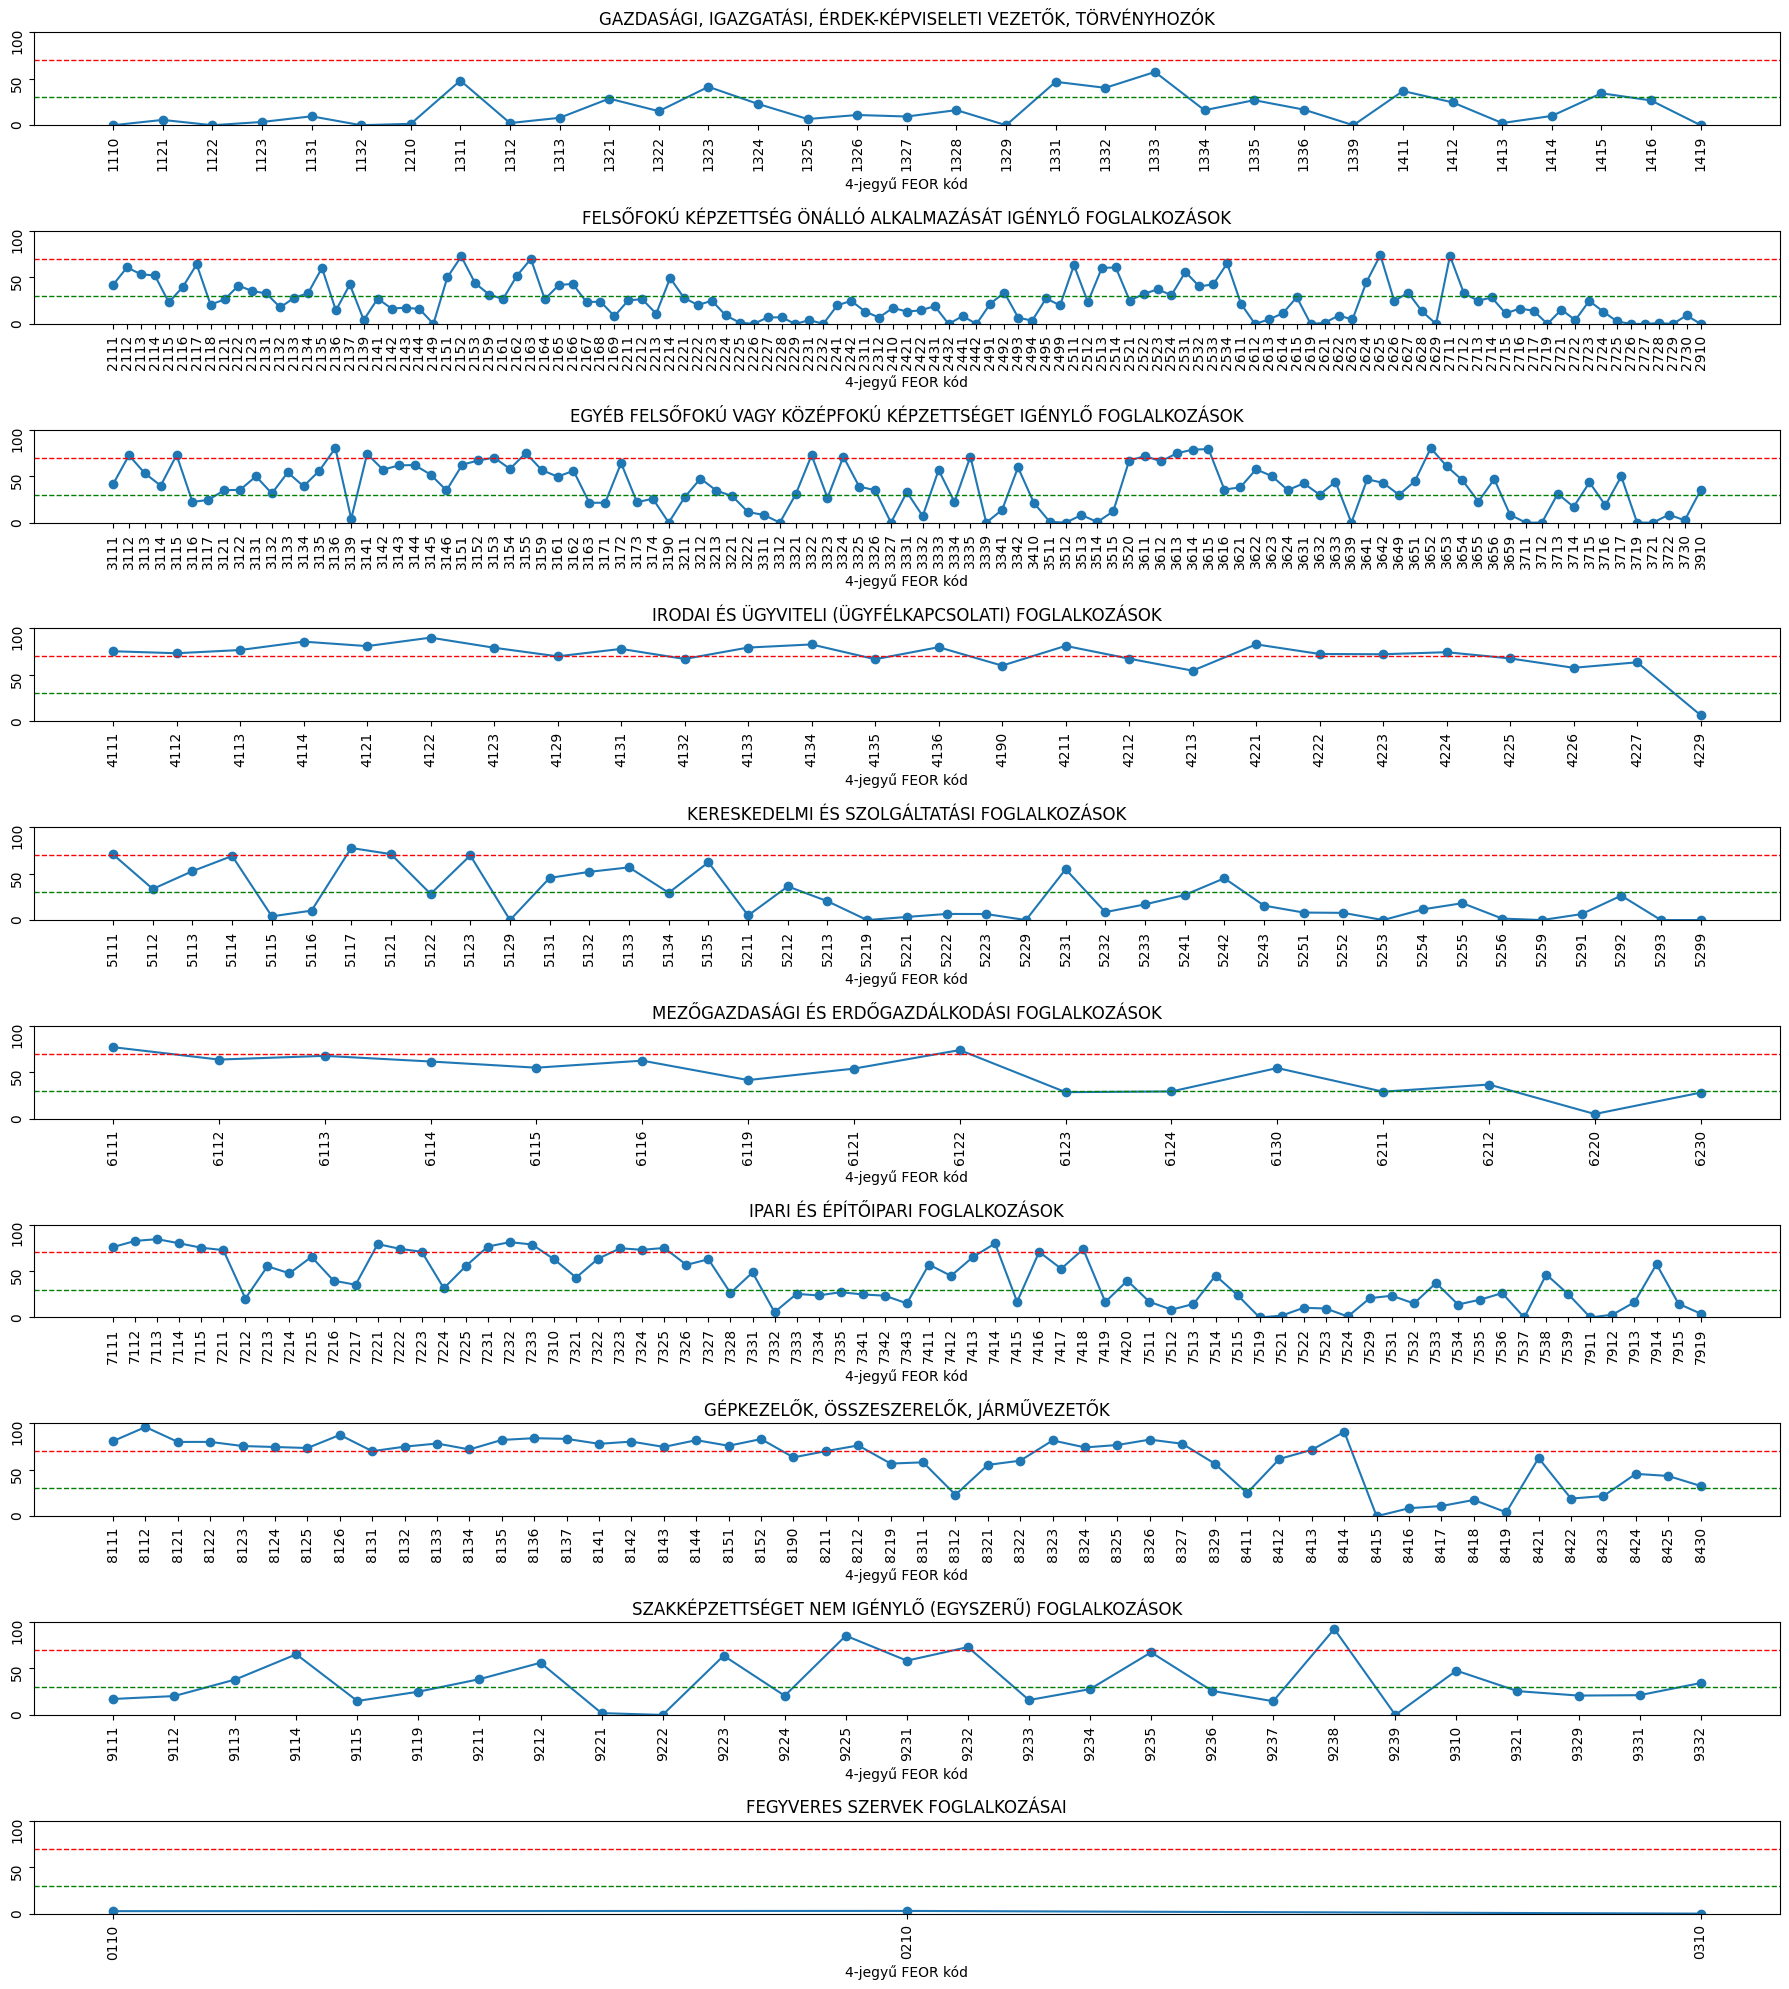

In [203]:
import matplotlib.pyplot as plt

# Map the first digit to a broader category as before
category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ FOGLALKOZÁSOK',
    '3': 'EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ FOGLALKOZÁSOK',
    '4': 'IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

# Prepare the figure with subplots
fig, axes = plt.subplots(10, 1, figsize=(18, 20))  # Adjust size as needed, 10 rows and 1 column
axes = axes.flatten()  # Flatten the array to easily iterate

feor_summary['FEOR_category'] = feor_summary['4_digit_FEOR_code'].astype(str).str[0].map(category_map)

# Iterate through each category to create a subplot
for i, (code, title) in enumerate(category_map.items()):
    # Filter data for the current category
    cat_data = feor_summary[feor_summary['FEOR_category'] == title]
    
    # Sort data for nicer plotting (optional)
    cat_data = cat_data.sort_values('4_digit_FEOR_code')
    
    # Plotting the data
    axes[i].plot(cat_data['4_digit_FEOR_code'], cat_data['task_share_x_feasibility'], marker='o', linestyle='-')
    axes[i].set_title(title)
    axes[i].set_xlabel('4-jegyű FEOR kód')
    axes[i].tick_params(labelrotation=90)  # Rotate labels for better readability

    # Set y-axis limits
    axes[i].set_ylim(0, 100)
    
    # Add horizontal lines at 70 and 30
    axes[i].axhline(70, color='red', linewidth=1, linestyle='--')
    axes[i].axhline(30, color='green', linewidth=1, linestyle='--')
    
    # Adjust plot to avoid label cut-offs
    plt.tight_layout()

# Save and show the plot
plt.savefig('/Users/matetoth/TDK_kodok/job_automation_feasibility_avg_all_codes.png', dpi=500, bbox_inches='tight')
plt.show()


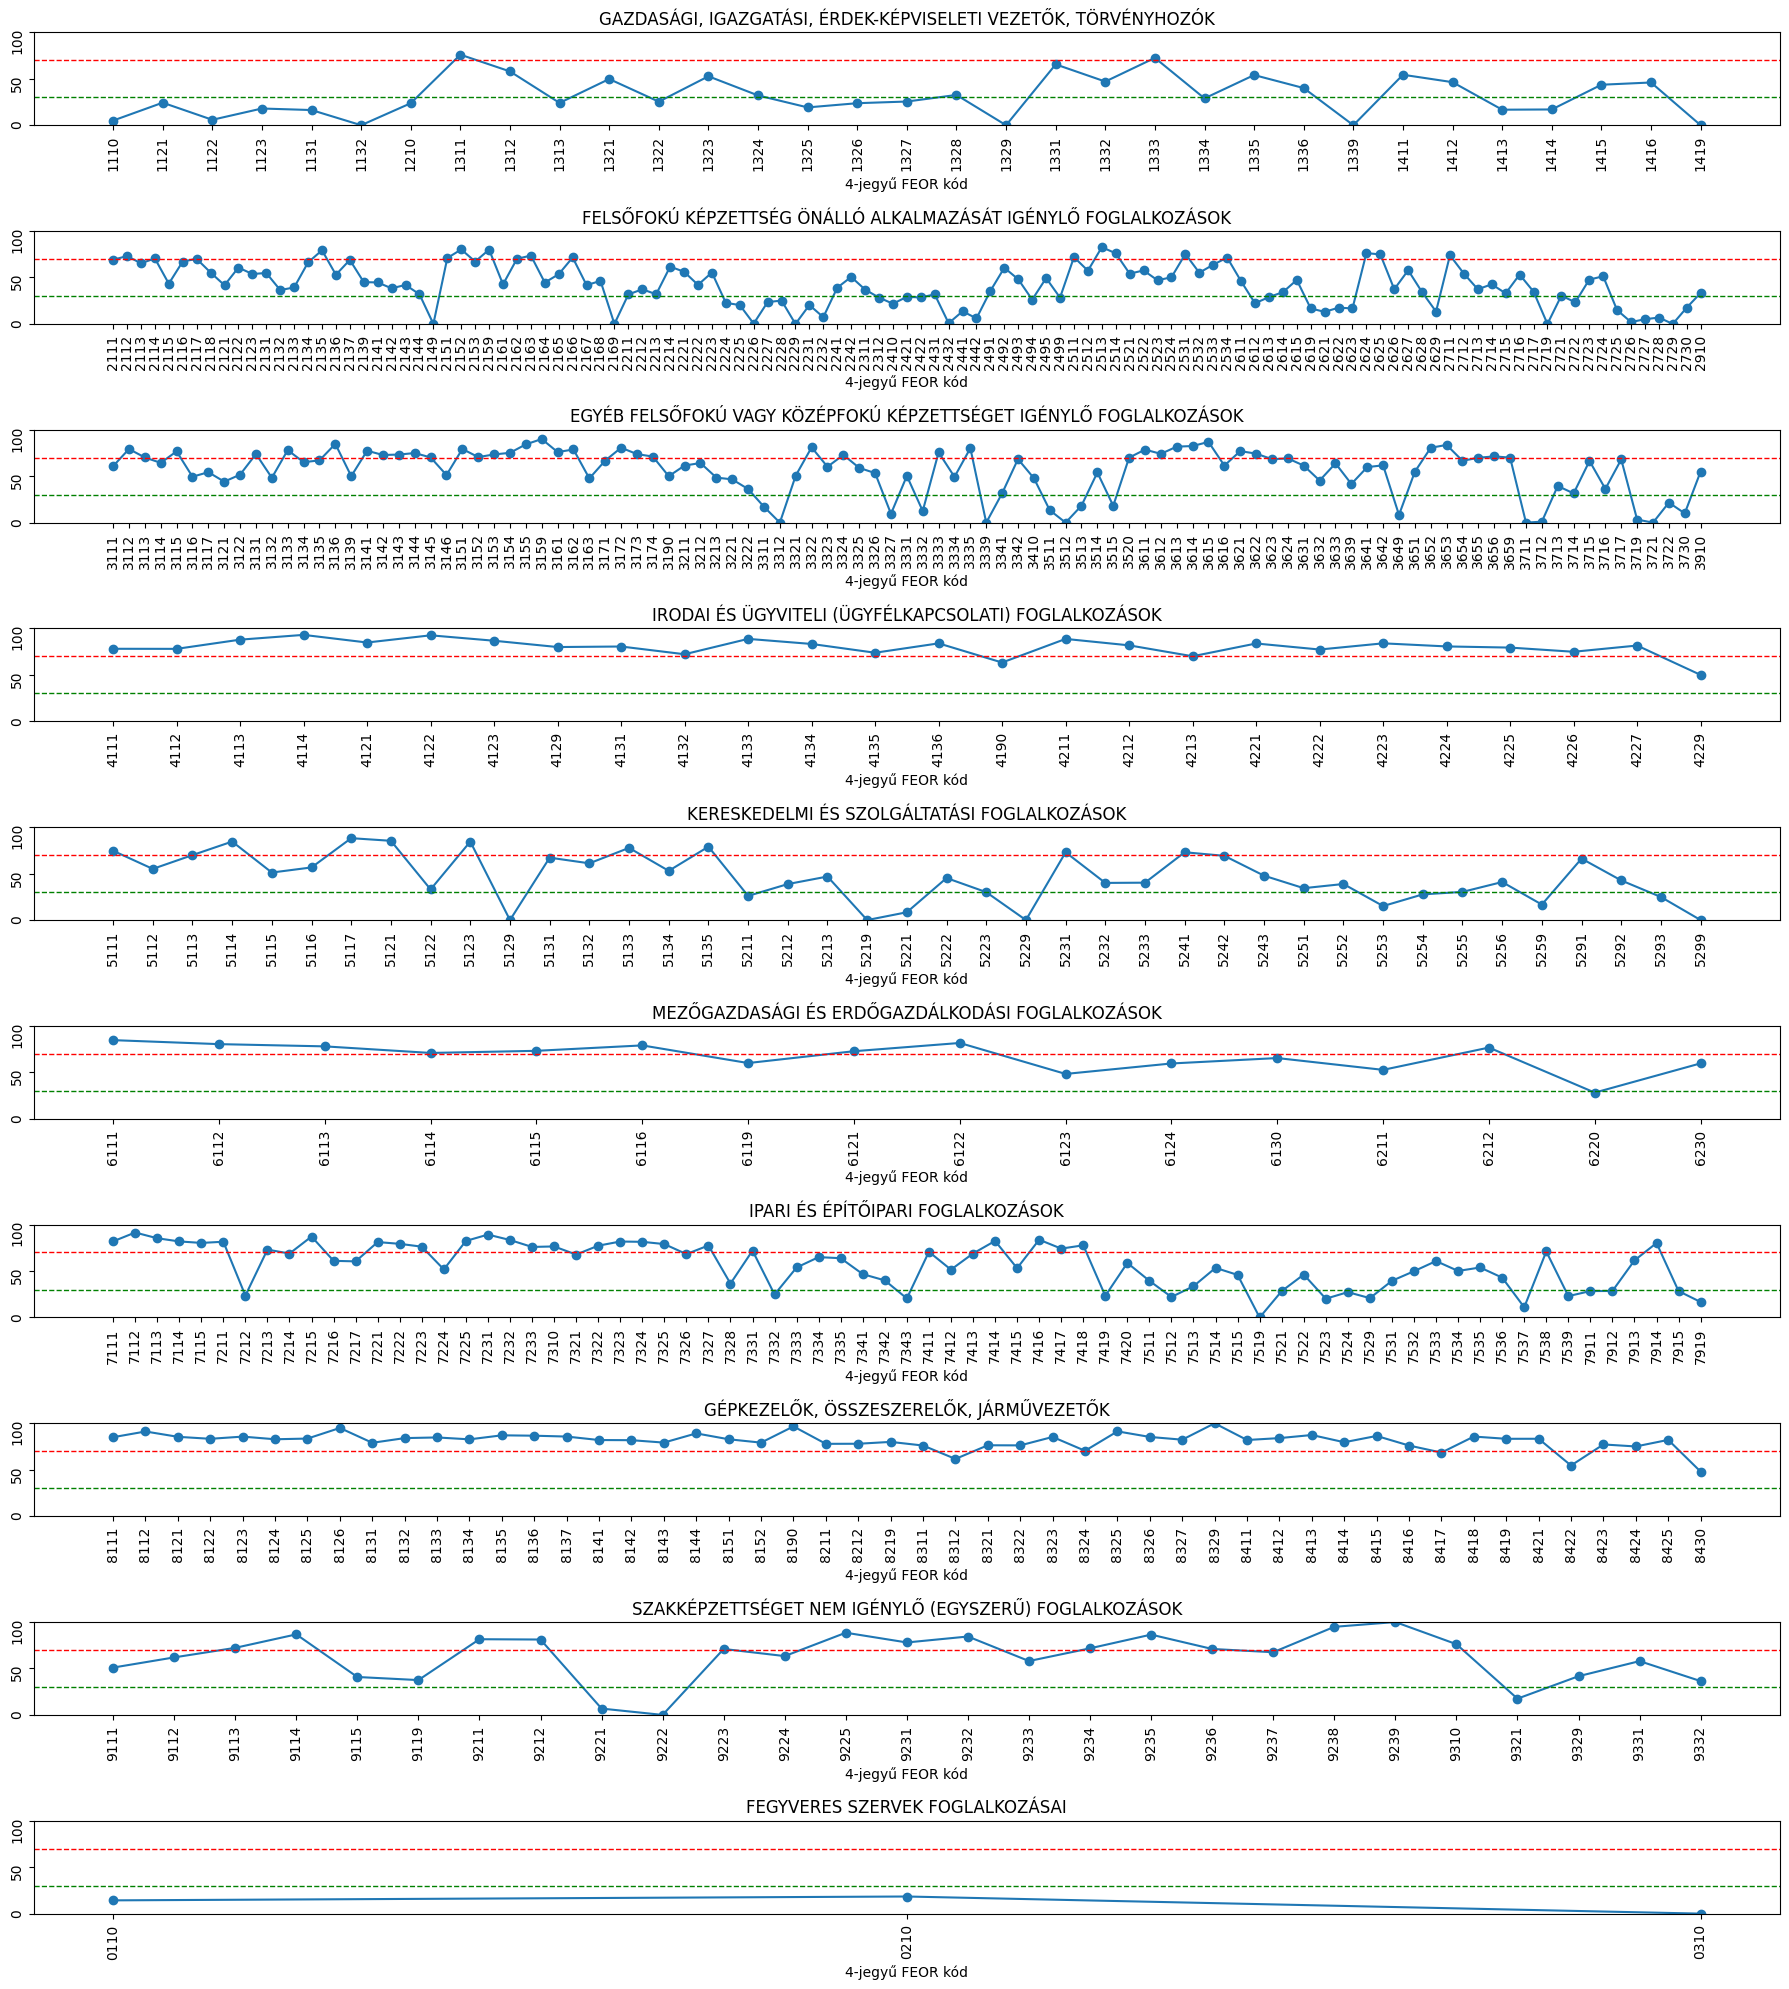

In [206]:
import matplotlib.pyplot as plt

# Map the first digit to a broader category as before
category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ FOGLALKOZÁSOK',
    '3': 'EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ FOGLALKOZÁSOK',
    '4': 'IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

# Prepare the figure with subplots
fig, axes = plt.subplots(10, 1, figsize=(18, 20))  # Adjust size as needed, 10 rows and 1 column
axes = axes.flatten()  # Flatten the array to easily iterate

feor_pos_summary['FEOR_category'] = feor_pos_summary['4_digit_FEOR_code'].astype(str).str[0].map(category_map)

# Iterate through each category to create a subplot
for i, (code, title) in enumerate(category_map.items()):
    # Filter data for the current category
    cat_data = feor_pos_summary[feor_pos_summary['FEOR_category'] == title]
    
    # Sort data for nicer plotting (optional)
    cat_data = cat_data.sort_values('4_digit_FEOR_code')
    
    # Plotting the data
    axes[i].plot(cat_data['4_digit_FEOR_code'], cat_data['task_share_x_avg'], marker='o', linestyle='-')
    axes[i].set_title(title)
    axes[i].set_xlabel('4-jegyű FEOR kód')
    axes[i].tick_params(labelrotation=90)  # Rotate labels for better readability

    # Set y-axis limits
    axes[i].set_ylim(0, 100)
    
    # Add horizontal lines at 70 and 30
    axes[i].axhline(70, color='red', linewidth=1, linestyle='--')
    axes[i].axhline(30, color='green', linewidth=1, linestyle='--')
    
    # Adjust plot to avoid label cut-offs
    plt.tight_layout()

# Save and show the plot
plt.savefig('/Users/matetoth/TDK_kodok/job_automation_possibility_avg_all_codes.png', dpi=500, bbox_inches='tight')

plt.show()

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Classify the feasibility as before
feor_summary['Automation_Category'] = feor_summary['task_share_x_feasibility'].apply(classify_feasibility)

# Define the correct order of categories
category_order = [
    'Nem érintett', 'Kis mértékben érintett', 'Nagy mértékben érintett', 'Átalakuló', 'Megszűnő'
]

# Ensure that the category column is categorical and ordered
feor_summary['Automation_Category'] = pd.Categorical(
    feor_summary['Automation_Category'],
    categories=category_order,
    ordered=True
)

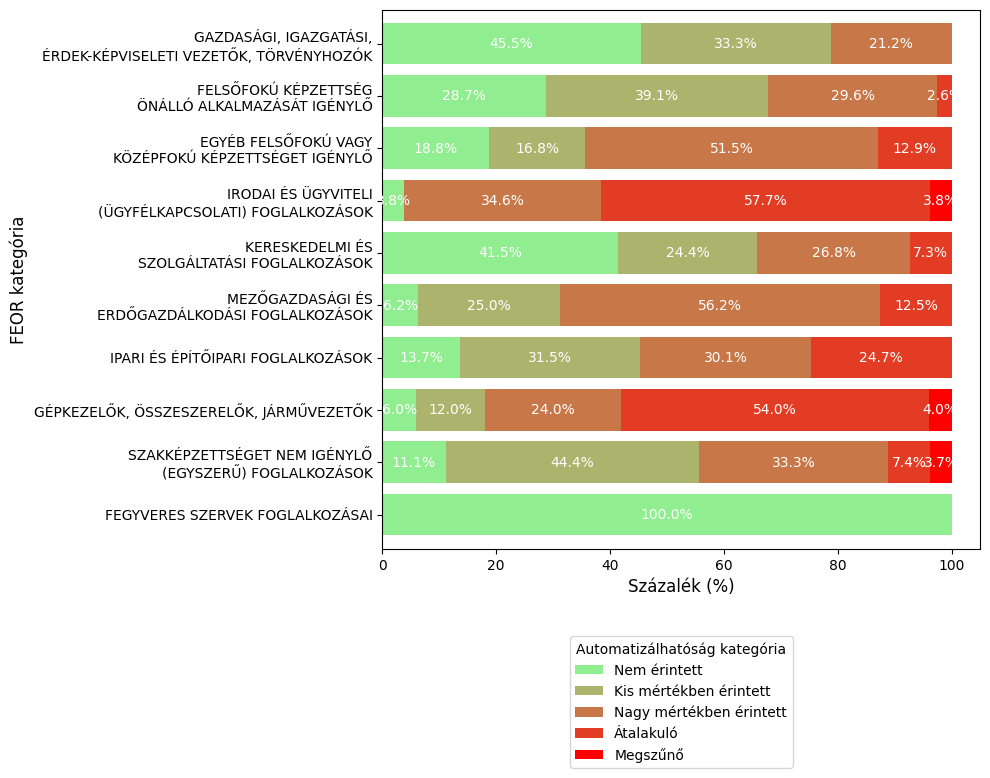

In [295]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI,\nÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG\nÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ',
    '3': 'EGYÉB FELSŐFOKÚ VAGY\nKÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ',
    '4': 'IRODAI ÉS ÜGYVITELI\n(ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS\nSZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS\nERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ\n(EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

# Convert FEOR_category to ordered categorical type based on the order in category_map
feor_summary['FEOR_category_name'] = pd.Categorical(
    feor_summary['FEOR_category'].map(category_map),
    categories=list(category_map.values())[::-1],
    ordered=True
)

# Create a pivot table for the percentage calculation with category names
category_counts = pd.crosstab(
    index=feor_summary['FEOR_category_name'],
    columns=feor_summary['Automation_Category'],
    normalize='index'
) * 100

# Convert counts to percentages
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100

# Define a custom colormap from black to red
colors = ['lightgreen', 'red']
cmap = mcolors.LinearSegmentedColormap.from_list("custom_colors", colors, N=5)

# Create the figure and plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = category_percentages.plot(kind='barh', stacked=True, ax=ax, colormap=cmap, width=0.8)

plt.xlabel('Százalék (%)', fontsize=12)
plt.ylabel('FEOR kategória', fontsize=12)
plt.legend(title='Automatizálhatóság kategória', bbox_to_anchor=(0.5, -0.15), loc='upper center')

# Annotate each bar with the corresponding percentage
for bar in bars.patches:
    width = bar.get_width()
    label_x_pos = bar.get_x() + width / 2
    label_y_pos = bar.get_y() + bar.get_height() / 2
    if width > 0:  # Threshold can be adjusted
        ax.text(label_x_pos, label_y_pos, f'{width:.1f}%', ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.savefig('/Users/matetoth/TDK_kodok/job_automation_feasibility_stacked.png', dpi=500, bbox_inches='tight')
plt.show()


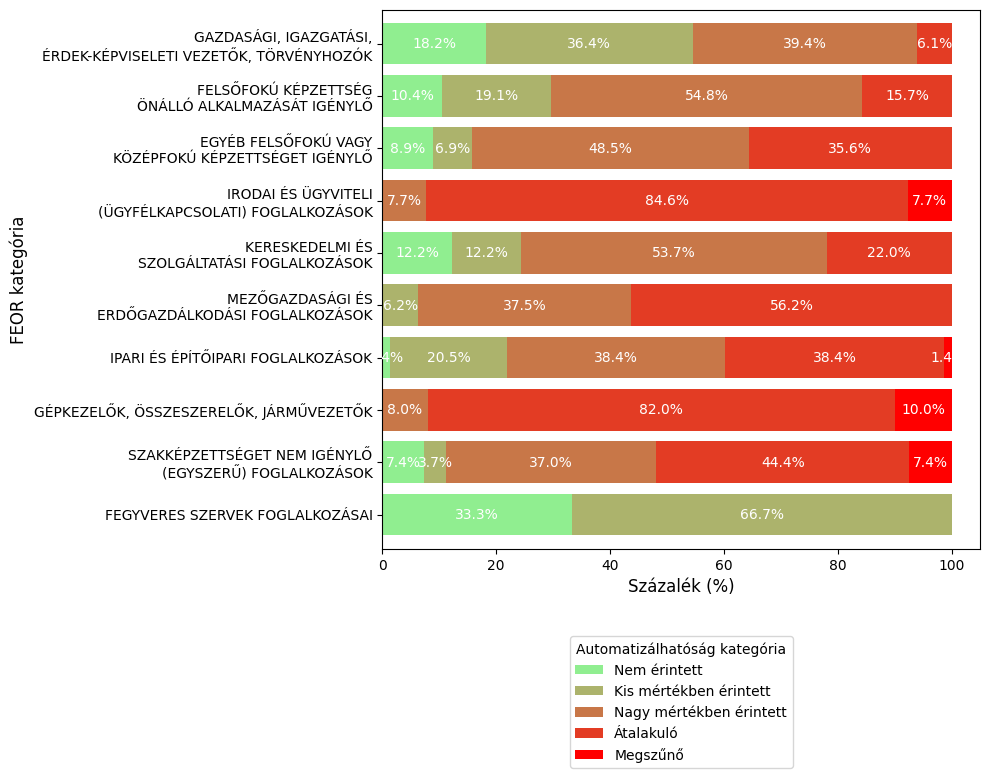

In [231]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# Define the category map for the y-axis labels with appropriate line breaks
category_map = {
    '1': 'GAZDASÁGI, IGAZGATÁSI,\nÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK',
    '2': 'FELSŐFOKÚ KÉPZETTSÉG\nÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ',
    '3': 'EGYÉB FELSŐFOKÚ VAGY\nKÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ',
    '4': 'IRODAI ÉS ÜGYVITELI\n(ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK',
    '5': 'KERESKEDELMI ÉS\nSZOLGÁLTATÁSI FOGLALKOZÁSOK',
    '6': 'MEZŐGAZDASÁGI ÉS\nERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK',
    '7': 'IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK',
    '8': 'GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK',
    '9': 'SZAKKÉPZETTSÉGET NEM IGÉNYLŐ\n(EGYSZERŰ) FOGLALKOZÁSOK',
    '0': 'FEGYVERES SZERVEK FOGLALKOZÁSAI'
}

# Update the FEOR category mapping
feor_pos_summary['FEOR_category_name'] = pd.Categorical(
    feor_pos_summary['4_digit_FEOR_code'].astype(str).str[0].map(category_map),
    categories=list(category_map.values())[::-1],  # Reverse the list of categories
    ordered=True
)

# Create a pivot table for the percentage calculation using 'task_share_x_avg'
category_counts = pd.crosstab(
    index=feor_pos_summary['FEOR_category_name'],
    columns=feor_pos_summary['task_share_x_avg'].apply(classify_feasibility),
    normalize='index'
) * 100

# Define the category order explicitly for clarity and to avoid any confusion
category_order = [
    'Nem érintett', 'Kis mértékben érintett', 'Nagy mértékben érintett', 'Átalakuló', 'Megszűnő'
]

# Use the order in the plotting
category_percentages = category_counts[category_order]  # Re-order columns if necessary

# Create the figure and plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = category_percentages.plot(kind='barh', stacked=True, ax=ax, colormap=cmap, width=0.8)

plt.xlabel('Százalék (%)', fontsize=12)
plt.ylabel('FEOR kategória', fontsize=12)
plt.legend(title='Automatizálhatóság kategória', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=1)

# Annotate each bar with the corresponding percentage
for bar in bars.patches:
    width = bar.get_width()
    label_x_pos = bar.get_x() + width / 2
    label_y_pos = bar.get_y() + bar.get_height() / 2
    if width > 0:  # Adjust visibility threshold as needed
        ax.text(label_x_pos, label_y_pos, f'{width:.1f}%', ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.savefig('/Users/matetoth/TDK_kodok/job_automation_possibility_stacked.png', dpi=500, bbox_inches='tight')
plt.show()


In [245]:
import matplotlib.pyplot as plt
import pandas as pd

# Specific FEOR codes for each category
gazdasagi_codes = ['1210'] + [f"{i}" for i in range(1300, 1400)] + [f"{i}" for i in range(1400, 1500)] + [f"{i}" for i in range(2500, 2600)] + ['2624'] + [f"{i}" for i in range(3610, 3620)] + [f"{i}" for i in range(3620, 3630)] + [f"{i}" for i in range(3630, 3640)] + [f"{i}" for i in range(3650, 3660)] + [f"{i}" for i in range(4120, 4130)] + ['5111']
informatikai_codes = ['2135', '2136'] + [f"{i}" for i in range(2140, 2150)] + [f"{i}" for i in range(2150, 2160)] + ['2711', '3133'] + [f"{i}" for i in range(3140, 3150)]

# Filter data for these categories from feor_pos_summary
gazdasagi_data = feor_summary[feor_summary['4_digit_FEOR_code'].isin(gazdasagi_codes)]
informatikai_data = feor_summary[feor_summary['4_digit_FEOR_code'].isin(informatikai_codes)]

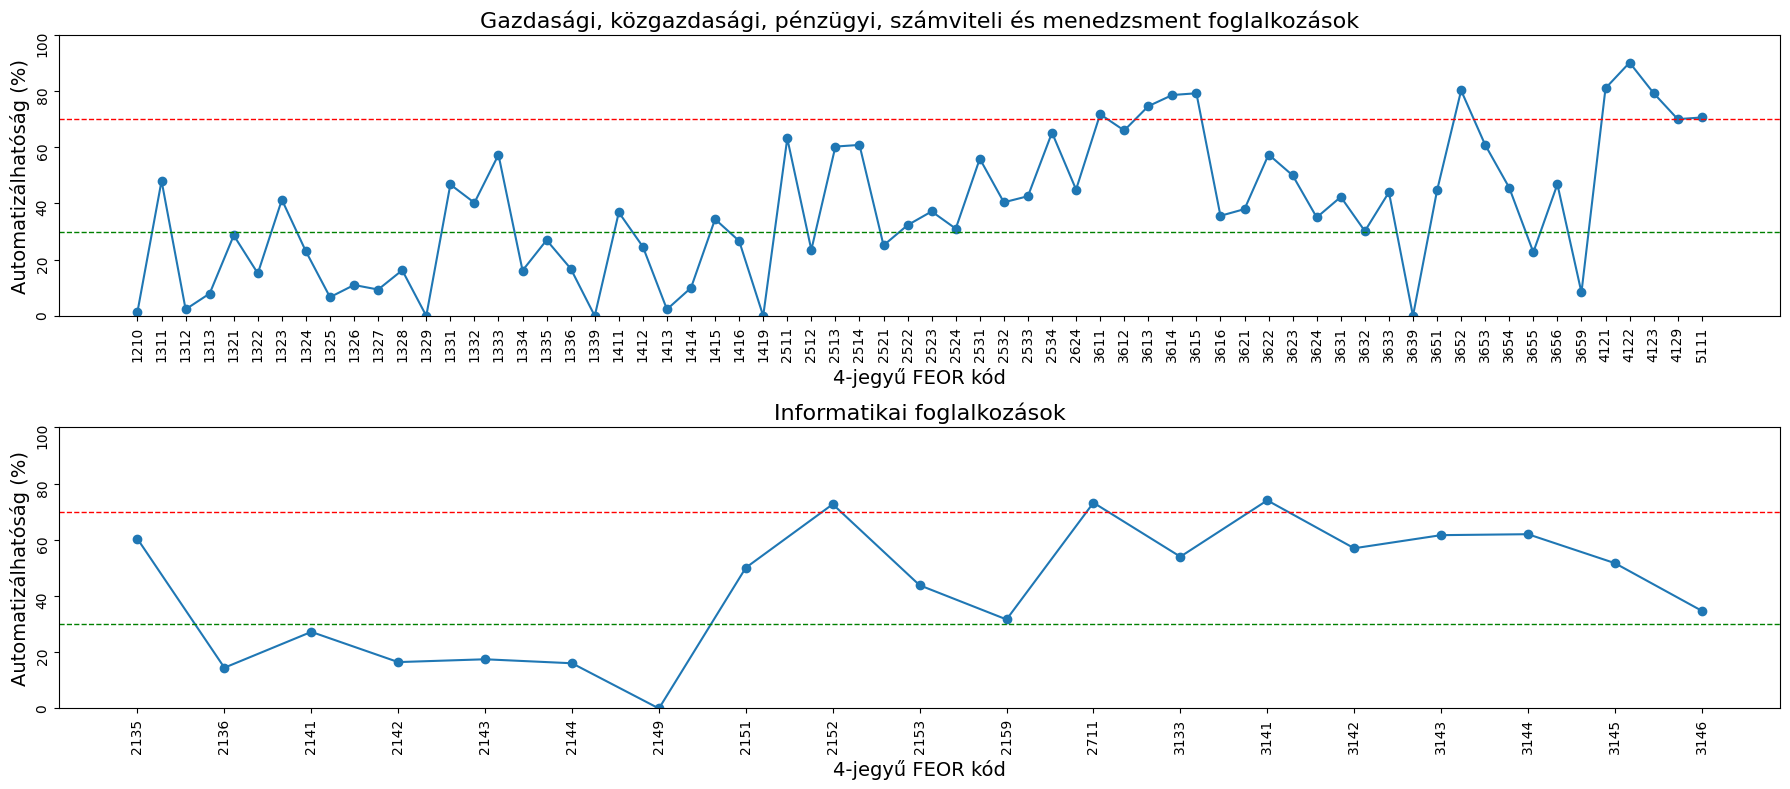

In [247]:
fig, axes = plt.subplots(2, 1, figsize=(18, 8))  # Two rows, one column

# Plot for Gazdasági-related occupations
axes[0].plot(gazdasagi_data['4_digit_FEOR_code'], gazdasagi_data['task_share_x_feasibility'], marker='o', linestyle='-')
axes[0].set_title('Gazdasági, közgazdasági, pénzügyi, számviteli és menedzsment foglalkozások', fontsize = 16)
axes[0].set_xlabel('4-jegyű FEOR kód', fontsize = 14)
axes[0].set_ylabel('Automatizálhatóság (%)', fontsize = 14)
axes[0].tick_params(labelrotation=90)
axes[0].set_ylim(0, 100)
axes[0].axhline(70, color='red', linewidth=1, linestyle='--')
axes[0].axhline(30, color='green', linewidth=1, linestyle='--')

# Plot for Informatikai-related occupations
axes[1].plot(informatikai_data['4_digit_FEOR_code'], informatikai_data['task_share_x_feasibility'], marker='o', linestyle='-')
axes[1].set_title('Informatikai foglalkozások', fontsize = 16)
axes[1].set_xlabel('4-jegyű FEOR kód', fontsize = 14)
axes[1].set_ylabel('Automatizálhatóság (%)', fontsize = 14)
axes[1].tick_params(labelrotation=90)
axes[1].set_ylim(0, 100)
axes[1].axhline(70, color='red', linewidth=1, linestyle='--')
axes[1].axhline(30, color='green', linewidth=1, linestyle='--')

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('/Users/matetoth/TDK_kodok/job_automation_feasibility_avg_specific_categories.png', dpi=500, bbox_inches='tight')
plt.show()

In [248]:
def weighted_average(data, value_col, weight_col):
    if weight_col in data.columns and data[weight_col].sum() > 0:
        return (data[value_col] * data[weight_col]).sum() / data[weight_col].sum()
    else:
        return data[value_col].mean()  # Fallback to simple average if no weights available

In [249]:
# Merge employment data to get the number of employees for each FEOR code
gazdasagi_data = pd.merge(gazdasagi_data, employment_df, on='4_digit_FEOR_code', how='left')
informatikai_data = pd.merge(informatikai_data, employment_df, on='4_digit_FEOR_code', how='left')

In [251]:
# Calculate the weighted average for Gazdasági-related occupations
gazdasagi_avg = weighted_average(gazdasagi_data, 'task_share_x_feasibility', 'Foglalkoztatottak_szama')
print(f"Az átlagos gazdaságos automatizálhatóság a gazdasági foglalkozások esetében: {gazdasagi_avg:.2f}%")

# Calculate the weighted average for Informatikai-related occupations
informatikai_avg = weighted_average(informatikai_data, 'task_share_x_feasibility', 'Foglalkoztatottak_szama')
print(f"Az átlagos gazdaságos automatizálhatóság az informatikai foglalkozások esetében: {informatikai_avg:.2f}%")

Az átlagos gazdaságos automatizálhatóság a gazdasági foglalkozások esetében: 42.50%
Az átlagos gazdaságos automatizálhatóság az informatikai foglalkozások esetében: 34.91%


In [253]:
import pandas as pd

# Calculate the simple average for Gazdasági-related occupations
gazdasagi_avg_simple = gazdasagi_data['task_share_x_feasibility'].mean()
print(f"Az átlagos gazdaságos automatizálhatóság a gazdasági foglalkozások esetében (súlyozás nélkül): {gazdasagi_avg_simple:.2f}%")

# Calculate the simple average for Informatikai-related occupations
informatikai_avg_simple = informatikai_data['task_share_x_feasibility'].mean()
print(f"Az átlagos gazdaságos automatizálhatóság az informatikai foglalkozások esetében (súlyozás nélkül): {informatikai_avg_simple:.2f}%")

Az átlagos gazdaságos automatizálhatóság a gazdasági foglalkozások esetében (súlyozás nélkül): 38.42%
Az átlagos gazdaságos automatizálhatóság az informatikai foglalkozások esetében (súlyozás nélkül): 43.09%


In [232]:
import matplotlib.pyplot as plt
import pandas as pd

# Specific FEOR codes for each category
gazdasagi_codes = ['1210'] + [f"{i}" for i in range(1300, 1400)] + [f"{i}" for i in range(1400, 1500)] + [f"{i}" for i in range(2500, 2600)] + ['2624'] + [f"{i}" for i in range(3610, 3620)] + [f"{i}" for i in range(3620, 3630)] + [f"{i}" for i in range(3630, 3640)] + [f"{i}" for i in range(3650, 3660)] + [f"{i}" for i in range(4120, 4130)] + ['5111']
informatikai_codes = ['2135', '2136'] + [f"{i}" for i in range(2140, 2150)] + [f"{i}" for i in range(2150, 2160)] + ['2711', '3133'] + [f"{i}" for i in range(3140, 3150)]

# Filter data for these categories from feor_pos_summary
gazdasagi_data = feor_pos_summary[feor_pos_summary['4_digit_FEOR_code'].isin(gazdasagi_codes)]
informatikai_data = feor_pos_summary[feor_pos_summary['4_digit_FEOR_code'].isin(informatikai_codes)]

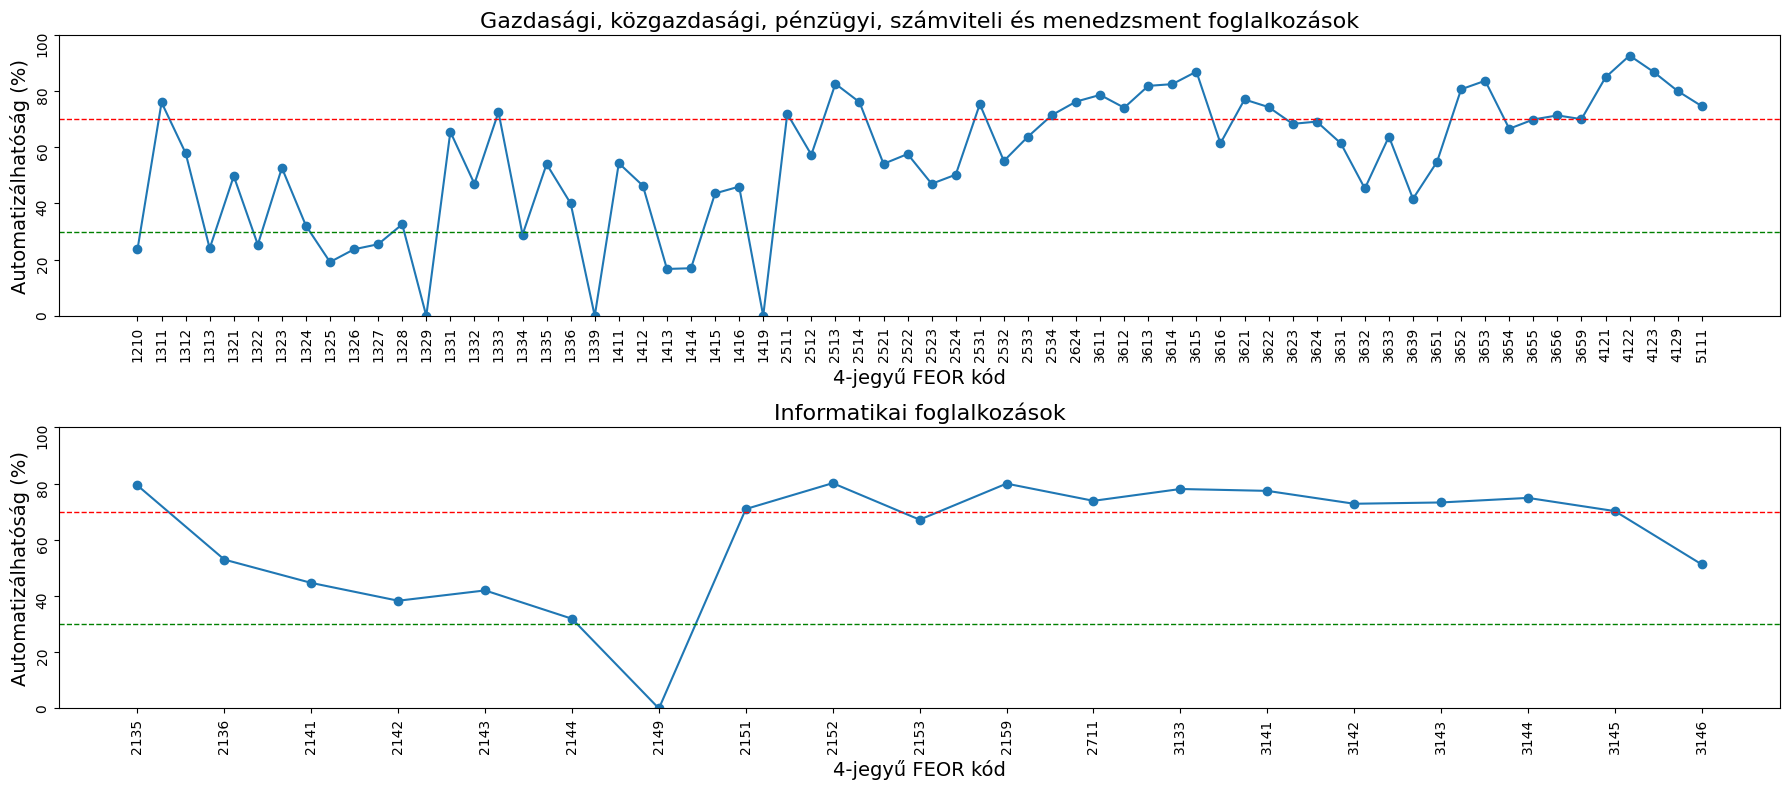

In [237]:
fig, axes = plt.subplots(2, 1, figsize=(18, 8))  # Two rows, one column

# Plot for Gazdasági-related occupations
axes[0].plot(gazdasagi_data['4_digit_FEOR_code'], gazdasagi_data['task_share_x_avg'], marker='o', linestyle='-')
axes[0].set_title('Gazdasági, közgazdasági, pénzügyi, számviteli és menedzsment foglalkozások', fontsize = 16)
axes[0].set_xlabel('4-jegyű FEOR kód', fontsize = 14)
axes[0].set_ylabel('Automatizálhatóság (%)', fontsize = 14)
axes[0].tick_params(labelrotation=90)
axes[0].set_ylim(0, 100)
axes[0].axhline(70, color='red', linewidth=1, linestyle='--')
axes[0].axhline(30, color='green', linewidth=1, linestyle='--')

# Plot for Informatikai-related occupations
axes[1].plot(informatikai_data['4_digit_FEOR_code'], informatikai_data['task_share_x_avg'], marker='o', linestyle='-')
axes[1].set_title('Informatikai foglalkozások', fontsize = 16)
axes[1].set_xlabel('4-jegyű FEOR kód', fontsize = 14)
axes[1].set_ylabel('Automatizálhatóság (%)', fontsize = 14)
axes[1].tick_params(labelrotation=90)
axes[1].set_ylim(0, 100)
axes[1].axhline(70, color='red', linewidth=1, linestyle='--')
axes[1].axhline(30, color='green', linewidth=1, linestyle='--')

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('/Users/matetoth/TDK_kodok/job_automation_possibility_avg_specific_categories.png', dpi=500, bbox_inches='tight')
plt.show()

In [238]:
def weighted_average(data, value_col, weight_col):
    if weight_col in data.columns and data[weight_col].sum() > 0:
        return (data[value_col] * data[weight_col]).sum() / data[weight_col].sum()
    else:
        return data[value_col].mean()  # Fallback to simple average if no weights available

In [242]:
# Merge employment data to get the number of employees for each FEOR code
gazdasagi_data = pd.merge(gazdasagi_data, employment_df, on='4_digit_FEOR_code', how='left')
informatikai_data = pd.merge(informatikai_data, employment_df, on='4_digit_FEOR_code', how='left')

In [244]:
# Calculate the weighted average for Gazdasági-related occupations
gazdasagi_avg = weighted_average(gazdasagi_data, 'task_share_x_avg', 'Foglalkoztatottak_szama')
print(f"Az átlagos automatizálhatóság a gazdasági foglalkozások esetében: {gazdasagi_avg:.2f}%")

# Calculate the weighted average for Informatikai-related occupations
informatikai_avg = weighted_average(informatikai_data, 'task_share_x_avg', 'Foglalkoztatottak_szama')
print(f"Az átlagos automatizálhatóság az informatikai foglalkozások esetében: {informatikai_avg:.2f}%")

Az átlagos automatizálhatóság a gazdasági foglalkozások esetében: 59.36%
Az átlagos automatizálhatóság az informatikai foglalkozások esetében: 52.22%


In [240]:
import pandas as pd

# Calculate the simple average for Gazdasági-related occupations
gazdasagi_avg_simple = gazdasagi_data['task_share_x_avg'].mean()
print(f"Az átlagos automatizálhatóság a gazdasági foglalkozások esetében (súlyozás nélkül): {gazdasagi_avg_simple:.2f}%")

# Calculate the simple average for Informatikai-related occupations
informatikai_avg_simple = informatikai_data['task_share_x_avg'].mean()
print(f"Az átlagos automatizálhatóság az informatikai foglalkozások esetében (súlyozás nélkül): {informatikai_avg_simple:.2f}%")


Az átlagos automatizálhatóság a gazdasági foglalkozások esetében (súlyozás nélkül): 55.99%
Az átlagos automatizálhatóság az informatikai foglalkozások esetében (súlyozás nélkül): 61.02%


In [243]:
gazdasagi_data

,4_digit_FEOR_code,task_share_x_avg,FEOR_category_x,FEOR_category_name,Megnevezes,Foglalkoztatottak_szama,FEOR_category_y
0,1210,23.6675,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...","GAZDASÁGI, IGAZGATÁSI,\nÉRDEK-KÉPVISELETI VEZE...","Gazdasági, költségvetési szervezet vezetője (i...",29992,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET..."
1,1311,75.9514,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...","GAZDASÁGI, IGAZGATÁSI,\nÉRDEK-KÉPVISELETI VEZE...","Mezőgazdasági, erdészeti, halászati és vadásza...",3997,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET..."
2,1312,57.9264,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...","GAZDASÁGI, IGAZGATÁSI,\nÉRDEK-KÉPVISELETI VEZE...",Ipari tevékenységet folytató egység vezetője,18659,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET..."
3,1313,24.0177,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...","GAZDASÁGI, IGAZGATÁSI,\nÉRDEK-KÉPVISELETI VEZE...",Építőipari tevékenységet folytató egység vezetője,15571,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET..."
4,1321,49.7404,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...","GAZDASÁGI, IGAZGATÁSI,\nÉRDEK-KÉPVISELETI VEZE...","Szállítási, logisztikai és raktározási tevéken...",22781,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET..."
...,...,...,...,...,...,...,...
61,4121,84.8755,IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALK...,IRODAI ÉS ÜGYVITELI\n(ÜGYFÉLKAPCSOLATI) FOGLAL...,Könyvelő (analitikus),27790,IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALK...
62,4122,92.6260,IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALK...,IRODAI ÉS ÜGYVITELI\n(ÜGYFÉLKAPCSOLATI) FOGLAL...,Bérelszámoló,8914,IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALK...
63,4123,86.7920,IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALK...,IRODAI ÉS ÜGYVITELI\n(ÜGYFÉLKAPCSOLATI) FOGLAL...,"Pénzügyi, statisztikai, biztosítási adminisztr...",6232,IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALK...
64,4129,80.0000,IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALK...,IRODAI ÉS ÜGYVITELI\n(ÜGYFÉLKAPCSOLATI) FOGLAL...,Egyéb számviteli foglalkozású,3021,IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALK...


# Foglalkoztatottság szerinti ábrázolások

In [76]:
import pandas as pd

# Load the Excel file
employment_data_path = '/Users/matetoth/Downloads/NSZ_A foglalkoztatottak száma foglalkozásonként 2022.xlsx'
employment_df = pd.read_excel(employment_data_path)

print(employment_df)

    A foglalkoztatottak száma foglalkozásonként, 2022  \
0                                 4 Jegyű FEOR-08 kód   
1                                                0110   
2                                                0210   
3                                                0310   
4                                                1110   
..                                                ...   
481                                              9310   
482                                              9321   
483                                              9329   
484                                              9331   
485                                              9332   

                                            Unnamed: 1  \
0                                           Megnevezés   
1    Fegyveres szervek felsőfokú képesítést igénylő...   
2    Fegyveres szervek középfokú képesítést igénylő...   
3    Fegyveres szervek középfokú képesítést nem igé...   
4                  Törvén

In [77]:
# Drop the first row which contains headings in the data part
employment_df = employment_df.iloc[1:].reset_index(drop=True)

# Rename columns for clarity
employment_df.columns = ['4_digit_FEOR_code', 'Megnevezes', 'Foglalkoztatottak_szama']

# Convert FEOR code and employment numbers to appropriate types
employment_df['4_digit_FEOR_code'] = employment_df['4_digit_FEOR_code'].astype(str)
employment_df['Foglalkoztatottak_szama'] = pd.to_numeric(employment_df['Foglalkoztatottak_szama'], errors='coerce')

In [152]:
employment_df

,4_digit_FEOR_code,Megnevezes,Foglalkoztatottak_szama,FEOR_category
0,0110,Fegyveres szervek felsőfokú képesítést igénylő...,7615,FEGYVERES SZERVEK FOGLALKOZÁSAI
1,0210,Fegyveres szervek középfokú képesítést igénylő...,18780,FEGYVERES SZERVEK FOGLALKOZÁSAI
2,0310,Fegyveres szervek középfokú képesítést nem igé...,1275,FEGYVERES SZERVEK FOGLALKOZÁSAI
3,1110,"Törvényhozó, miniszter, államtitkár",887,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET..."
4,1121,"Országos és területi közigazgatás, igazságszol...",5384,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET..."
...,...,...,...,...
480,9310,Egyszerű ipari foglalkozású,50127,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...
481,9321,Kubikos,2443,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...
482,9329,Egyéb egyszerű építőipari foglalkozású,52229,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...
483,9331,Egyszerű mezőgazdasági foglalkozású,48026,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...


In [154]:
# Join the dataframes on '4_digit_FEOR_code' to get the automation feasibility scores for each FEOR code
merged_df = pd.merge(employment_df, feor_summary[['4_digit_FEOR_code', 'task_share_x_feasibility']],
                     on='4_digit_FEOR_code')

# Map the FEOR_category based on the first digit of '4_digit_FEOR_code'
merged_df['FEOR_category'] = merged_df['4_digit_FEOR_code'].astype(str).str[0].map(category_map)
merged_df

,4_digit_FEOR_code,Megnevezes,Foglalkoztatottak_szama,FEOR_category,task_share_x_feasibility
0,0110,Fegyveres szervek felsőfokú képesítést igénylő...,7615,FEGYVERES SZERVEK FOGLALKOZÁSAI,2.6670
1,0210,Fegyveres szervek középfokú képesítést igénylő...,18780,FEGYVERES SZERVEK FOGLALKOZÁSAI,2.9162
2,0310,Fegyveres szervek középfokú képesítést nem igé...,1275,FEGYVERES SZERVEK FOGLALKOZÁSAI,0.0000
3,1110,"Törvényhozó, miniszter, államtitkár",887,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",0.0000
4,1121,"Országos és területi közigazgatás, igazságszol...",5384,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",5.7167
...,...,...,...,...,...
480,9310,Egyszerű ipari foglalkozású,50127,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,47.6660
481,9321,Kubikos,2443,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,25.6250
482,9329,Egyéb egyszerű építőipari foglalkozású,52229,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,20.8300
483,9331,Egyszerű mezőgazdasági foglalkozású,48026,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,21.2500


In [155]:
# Join the dataframes on '4_digit_FEOR_code' to get the automation possibility scores for each FEOR code
merged_pos_df = pd.merge(employment_df, feor_pos_summary[['4_digit_FEOR_code', 'task_share_x_avg']],
                     on='4_digit_FEOR_code')

# Map the FEOR_category based on the first digit of '4_digit_FEOR_code'
merged_pos_df['FEOR_category'] = merged_pos_df['4_digit_FEOR_code'].astype(str).str[0].map(category_map)
merged_pos_df

,4_digit_FEOR_code,Megnevezes,Foglalkoztatottak_szama,FEOR_category,task_share_x_avg
0,0110,Fegyveres szervek felsőfokú képesítést igénylő...,7615,FEGYVERES SZERVEK FOGLALKOZÁSAI,14.2905
1,0210,Fegyveres szervek középfokú képesítést igénylő...,18780,FEGYVERES SZERVEK FOGLALKOZÁSAI,18.4338
2,0310,Fegyveres szervek középfokú képesítést nem igé...,1275,FEGYVERES SZERVEK FOGLALKOZÁSAI,0.0000
3,1110,"Törvényhozó, miniszter, államtitkár",887,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",4.9980
4,1121,"Országos és területi közigazgatás, igazságszol...",5384,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",24.2590
...,...,...,...,...,...
480,9310,Egyszerű ipari foglalkozású,50127,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,76.1660
481,9321,Kubikos,2443,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,17.5000
482,9329,Egyéb egyszerű építőipari foglalkozású,52229,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,41.6700
483,9331,Egyszerű mezőgazdasági foglalkozású,48026,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,57.9175


In [95]:
# Create bins for automation feasibility scores
bins = np.linspace(0, 100, 11)  # Creates 10 bins from 0 to 100
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
merged_df['feasibility_bin'] = pd.cut(merged_df['task_share_x_feasibility'], bins=bins, labels=labels, include_lowest=True)

# Sum 'Foglalkoztatottak_szama' for each 'FEOR_category' and 'feasibility_bin'
grouped_df = merged_df.groupby(['FEOR_category', 'feasibility_bin'])['Foglalkoztatottak_szama'].sum().unstack(fill_value=0)
grouped_df

feasibility_bin,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
FEOR_category,,,,,,,,,,
EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ,171888,14317,90513,170316,119853,106981,42691,107046,17100,0
FEGYVERES SZERVEK FOGLALKOZÁSAI,27670,0,0,0,0,0,0,0,0,0
FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ,197654,258053,162768,94591,66861,30011,56603,17900,0,0
"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK",135176,32401,39944,21128,15991,23919,0,0,0,0
"GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK",25357,152659,9635,1322,53488,24231,36727,165348,61719,930
IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK,93636,113612,68315,12222,138956,3056,11416,117315,9282,0
IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK,7504,0,0,0,0,26430,53045,171467,47033,8914
KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK,168079,59635,54983,27936,20745,235775,15932,78627,0,0
MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK,1958,0,5994,4617,2864,79047,4241,3298,0,0


<Figure size 1400x1200 with 0 Axes>

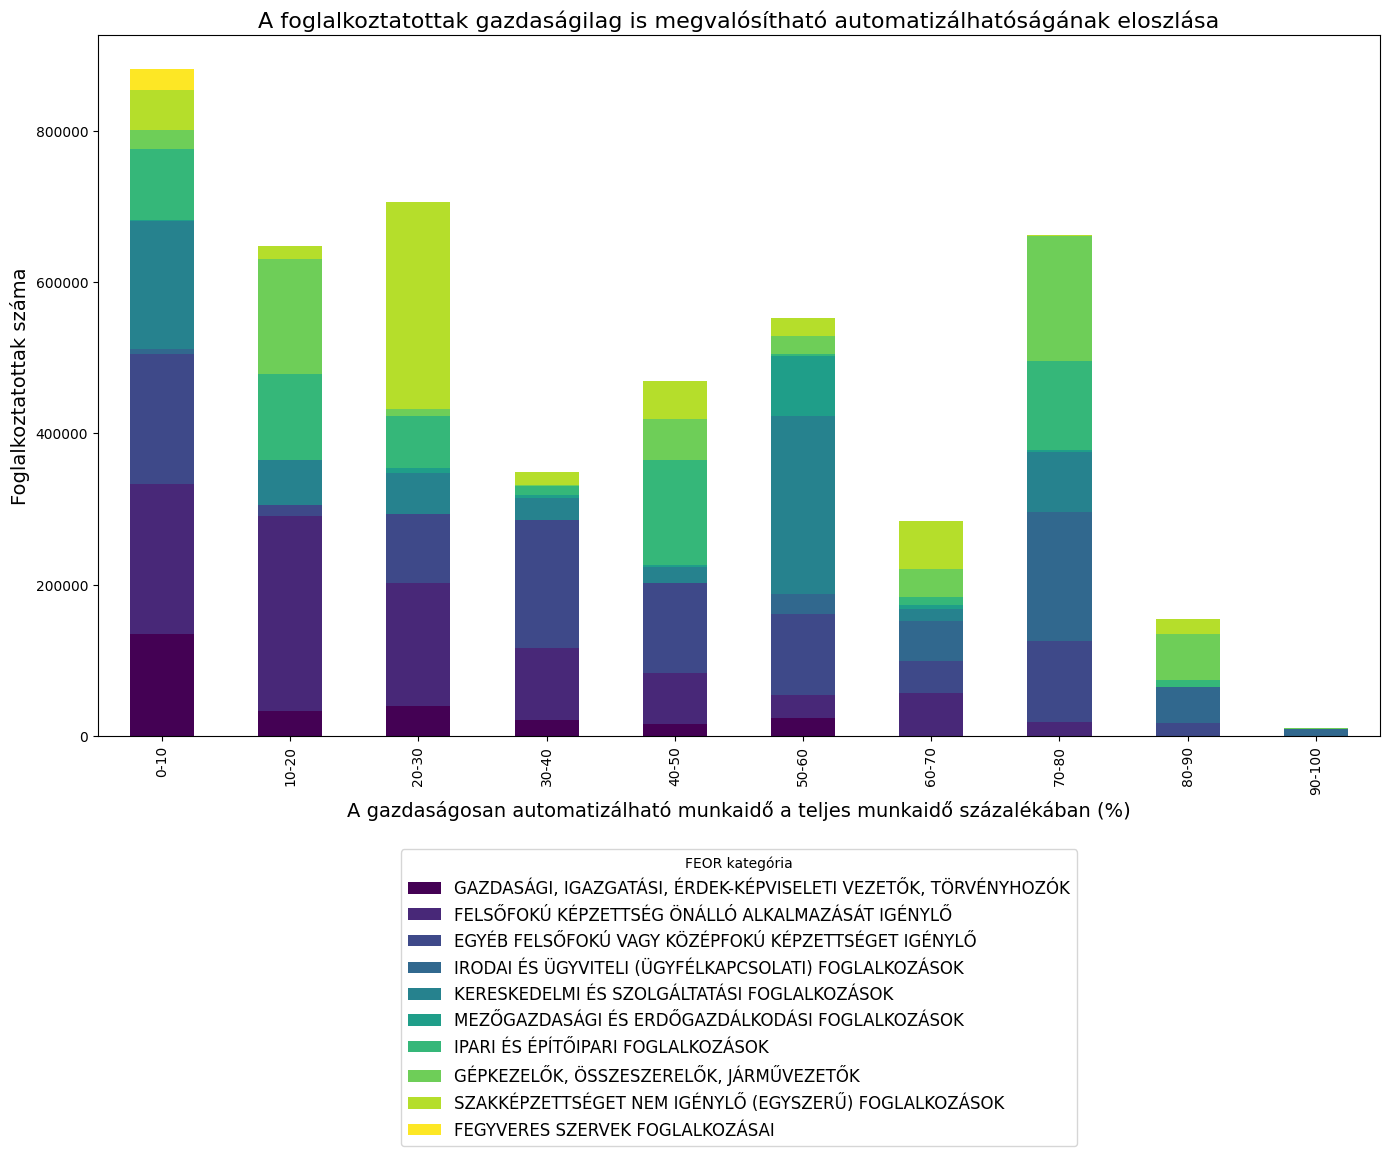

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'grouped_df' ready and ordered by FEOR categories as in previous steps

# Generate the color map with the same number of colors as categories
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped_df.index)))

# Plotting
plt.figure(figsize=(14, 12))
# Ensure 'grouped_df' columns are ordered as per 'category_map' if not done already
grouped_df = grouped_df.loc[categories_ordered]  # This assumes 'categories_ordered' list is available and correct

bar = grouped_df.T.plot(kind='bar', stacked=True, color=colors, figsize=(14, 12))
plt.title('A foglalkoztatottak gazdaságilag is megvalósítható automatizálhatóságának eloszlása', fontsize=16)
plt.xlabel('A gazdaságosan automatizálható munkaidő a teljes munkaidő százalékában (%)', fontsize=14)
plt.ylabel('Foglalkoztatottak száma', fontsize=14)

# Adjusting the legend
plt.legend(title='FEOR kategória', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=1, frameon=True, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('/Users/matetoth/TDK_kodok/job_automation_feasibility_avg_employment_distribution_by_FEOR_groups.png', dpi=1000, bbox_inches='tight')
plt.show()


In [135]:
def analyze_employment(df, feasibility_column, employment_column):
    # Sum of 'Foglalkoztatottak_szama' for all rows
    total_employment = df[employment_column].sum()

    # Sum of 'Foglalkoztatottak_szama' with feasibility < 10
    employment_less_than_10 = df[df[feasibility_column] < 10][employment_column].sum()

    # Sum of 'Foglalkoztatottak_szama' with feasibility < 30
    employment_less_than_30 = df[df[feasibility_column] < 30][employment_column].sum()

    # Sum of 'Foglalkoztatottak_szama' with feasibility > 70
    employment_more_than_70 = df[df[feasibility_column] > 70][employment_column].sum()

    # Sum of 'Foglalkoztatottak_szama' with feasibility > 90
    employment_more_than_90 = df[df[feasibility_column] > 90][employment_column].sum()

    # Average feasibility
    avg_feasibility = df[feasibility_column].mean()

    # Printing the results
    print(f"Total employment: {total_employment}")
    print(f"Employment with {feasibility_column} < 10: {employment_less_than_10}")
    print(f"Employment with {feasibility_column} < 30: {employment_less_than_30}")
    print(f"Employment with {feasibility_column} > 70: {employment_more_than_70}")
    print(f"Employment with {feasibility_column} > 90: {employment_more_than_90}")

# Assuming you have a merged DataFrame named 'merged_df' that includes both the 'task_share_x_feasibility' and 'Foglalkoztatottak_szama' columns
print("Analysis for merged data (Automation Feasibility vs Employment):")
analyze_employment(merged_df, 'task_share_x_feasibility', 'Foglalkoztatottak_szama')


Analysis for merged data (Automation Feasibility vs Employment):
Total employment: 4718660
Employment with task_share_x_feasibility < 10: 880493
Employment with task_share_x_feasibility < 30: 2230552
Employment with task_share_x_feasibility > 70: 827836
Employment with task_share_x_feasibility > 90: 10647


In [136]:
def calculate_weighted_average_feasibility(df, feasibility_column, employment_column):
    # Calculate the product of feasibility and employment for each row
    df['weighted_feasibility'] = df[feasibility_column] * df[employment_column]
    
    # Sum these products across all rows
    total_weighted_feasibility = df['weighted_feasibility'].sum()
    
    # Sum of 'Foglalkoztatottak_szama' for all rows to get total employment
    total_employment = df[employment_column].sum()
    
    # Calculate the weighted average feasibility per employee
    average_feasibility_per_employee = total_weighted_feasibility / total_employment
    
    return average_feasibility_per_employee

# Assuming 'merged_df' is your DataFrame with both 'task_share_x_feasibility' and 'Foglalkoztatottak_szama'
average_feasibility = calculate_weighted_average_feasibility(merged_df, 'task_share_x_feasibility', 'Foglalkoztatottak_szama')
print(f"Average automation feasibility per employee: {average_feasibility:.2f}")

Average automation feasibility per employee: 37.05


In [156]:
# Create bins for automation possibility scores
bins = np.linspace(0, 100, 11)  # Creates 10 bins from 0 to 100
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
merged_pos_df['possibility_bin'] = pd.cut(merged_pos_df['task_share_x_avg'], bins=bins, labels=labels, include_lowest=True)

# Sum 'Foglalkoztatottak_szama' for each 'FEOR_category' and 'feasibility_bin'
grouped_pos_df = merged_pos_df.groupby(['FEOR_category', 'possibility_bin'])['Foglalkoztatottak_szama'].sum().unstack(fill_value=0)
grouped_pos_df

possibility_bin,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
FEOR_category,,,,,,,,,,
EGYÉB FELSŐFOKÚ VAGY KÖZÉPFOKÚ KÉPZETTSÉGET IGÉNYLŐ,23354,92272,5127,16969,135194,133205,156935,210645,67004,0
FEGYVERES SZERVEK FOGLALKOZÁSAI,1275,26395,0,0,0,0,0,0,0,0
FELSŐFOKÚ KÉPZETTSÉG ÖNÁLLÓ ALKALMAZÁSÁT IGÉNYLŐ,62416,33669,113399,249213,123399,114843,69146,101394,16962,0
"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZETŐK, TÖRVÉNYHOZÓK",49315,10768,78820,13682,47481,39069,1508,27916,0,0
"GÉPKEZELŐK, ÖSSZESZERELŐK, JÁRMŰVEZETŐK",0,0,0,0,1322,17468,116264,176441,192639,27282
IPARI ÉS ÉPÍTŐIPARI FOGLALKOZÁSOK,5302,16106,106729,55445,34492,66952,105529,98727,76292,2236
IRODAI ÉS ÜGYVITELI (ÜGYFÉLKAPCSOLATI) FOGLALKOZÁSOK,0,0,0,0,7504,0,25883,164764,101699,14543
KERESKEDELMI ÉS SZOLGÁLTATÁSI FOGLALKOZÁSOK,51694,14243,66971,75854,44338,52283,235184,72268,48877,0
MEZŐGAZDASÁGI ÉS ERDŐGAZDÁLKODÁSI FOGLALKOZÁSOK,0,0,1958,0,1862,6996,48343,38836,4024,0


<Figure size 1200x800 with 0 Axes>

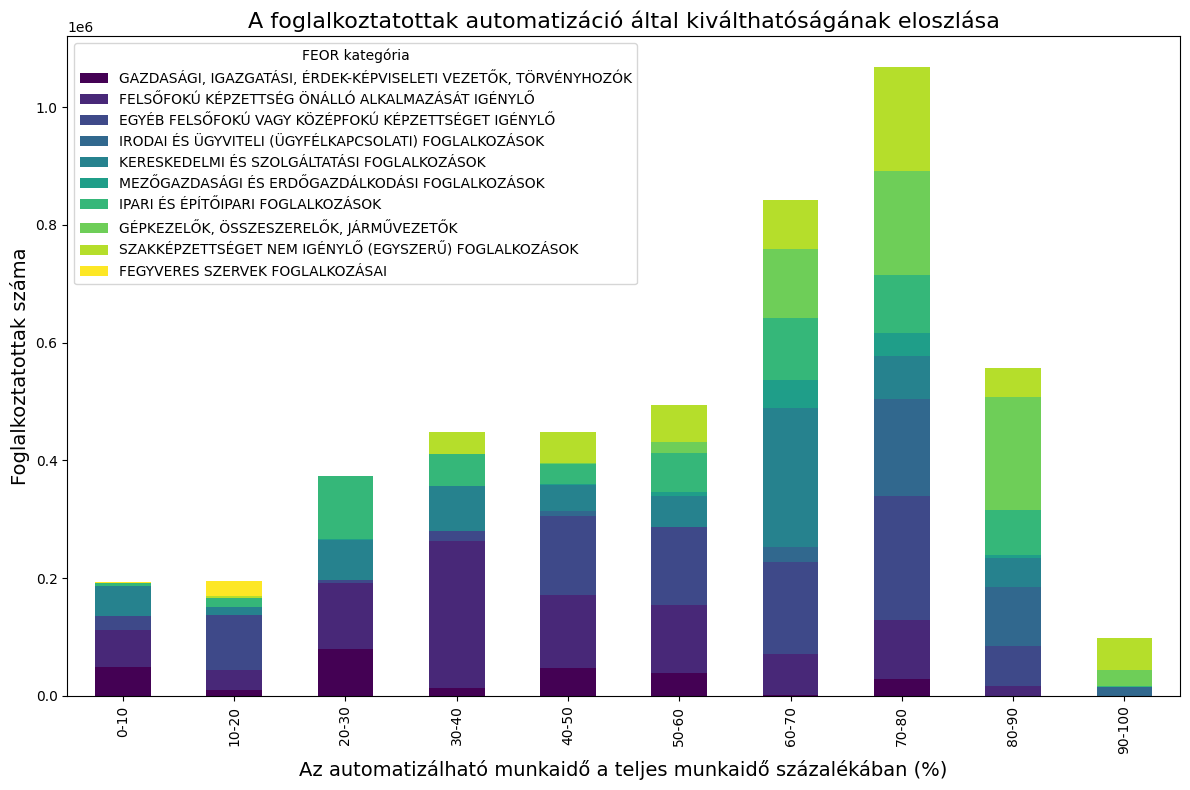

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the color map with the same number of colors as categories
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped_df.index)))

# Plotting
plt.figure(figsize=(12, 8))
# Ensure 'grouped__pos_df' columns are ordered as per 'category_map' if not done already
grouped_pos_df = grouped_pos_df.loc[categories_ordered]  # This assumes 'categories_ordered' list is available and correct

bar = grouped_pos_df.T.plot(kind='bar', stacked=True, color=colors, figsize = (12, 8))
plt.title('A foglalkoztatottak automatizáció által kiválthatóságának eloszlása', fontsize=16)
plt.xlabel('Az automatizálható munkaidő a teljes munkaidő százalékában (%)', fontsize=14)
plt.ylabel('Foglalkoztatottak száma', fontsize=14)
plt.legend(title='FEOR kategória')
plt.tight_layout()
plt.savefig('/Users/matetoth/TDK_kodok/job_automation_possibility_avg_employment_distribution_by_FEOR_groups.png', dpi=500, bbox_inches='tight')
plt.show()

In [179]:
# Assuming you have a merged DataFrame named 'merged_df' that includes both the 'task_share_x_feasibility' and 'Foglalkoztatottak_szama' columns
print("Analysis for merged data (Automation Possibility vs Employment):")
analyze_employment(merged_pos_df, 'task_share_x_avg', 'Foglalkoztatottak_szama')

Analysis for merged data (Automation Possibility vs Employment):
Total employment: 4718660
Employment with task_share_x_avg < 10: 192268
Employment with task_share_x_avg < 30: 762308
Employment with task_share_x_avg > 70: 1723078
Employment with task_share_x_avg > 90: 98172


In [193]:
merged_pos_df

,4_digit_FEOR_code,Megnevezes,Foglalkoztatottak_szama,FEOR_category,task_share_x_avg,possibility_bin
0,0110,Fegyveres szervek felsőfokú képesítést igénylő...,7615,FEGYVERES SZERVEK FOGLALKOZÁSAI,14.2905,10-20
1,0210,Fegyveres szervek középfokú képesítést igénylő...,18780,FEGYVERES SZERVEK FOGLALKOZÁSAI,18.4338,10-20
2,0310,Fegyveres szervek középfokú képesítést nem igé...,1275,FEGYVERES SZERVEK FOGLALKOZÁSAI,0.0000,0-10
3,1110,"Törvényhozó, miniszter, államtitkár",887,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",4.9980,0-10
4,1121,"Országos és területi közigazgatás, igazságszol...",5384,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",24.2590,20-30
...,...,...,...,...,...,...
480,9310,Egyszerű ipari foglalkozású,50127,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,76.1660,70-80
481,9321,Kubikos,2443,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,17.5000,10-20
482,9329,Egyéb egyszerű építőipari foglalkozású,52229,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,41.6700,40-50
483,9331,Egyszerű mezőgazdasági foglalkozású,48026,SZAKKÉPZETTSÉGET NEM IGÉNYLŐ (EGYSZERŰ) FOGLAL...,57.9175,50-60


In [194]:
def calculate_weighted_average_possibility(df, possibility_column, employment_column):
    # Calculate the product of feasibility and employment for each row
    df['weighted_feasibility'] = df[possibility_column] * df[employment_column]
    
    # Sum these products across all rows
    total_weighted_possibility = df['weighted_feasibility'].sum()
    
    # Sum of 'Foglalkoztatottak_szama' for all rows to get total employment
    total_employment = df[employment_column].sum()
    
    # Calculate the weighted average feasibility per employee
    average_possibility_per_employee = total_weighted_possibility / total_employment
    
    return average_possibility_per_employee

# Assuming 'merged_df' is your DataFrame with both 'task_share_x_feasibility' and 'Foglalkoztatottak_szama'
average_feasibility = calculate_weighted_average_feasibility(merged_pos_df, 'task_share_x_avg', 'Foglalkoztatottak_szama')
print(f"Average automation possibility per employee: {average_feasibility:.2f}")

Average automation possibility per employee: 57.16
